In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector

In [2]:
with open('credentials.txt','r') as f:
    password = f.read().strip()

conn = mysql.connector.connect(host='127.0.0.1',port=3306, username='root',password=password,auth_plugin='mysql_native_password',database='mydb')

people = pd.read_sql('SELECT * FROM people',conn)
preferences = pd.read_sql('SELECT * FROM preferences',conn)
job = pd.read_sql('SELECT * FROM job',conn)

conn.close()

In [3]:
combined = pd.concat([people,preferences,job],axis=1)
combined.drop('id',axis=1,inplace=True)
combined.columns = [col.upper() for col in combined.columns]

haryana = ['Hisar','Rohtak','Gurgaon','Ambala','Faridabad','Rewari']
rajasthan = ['Bikaner','Jaisalmer','Ajmer','Jodhpur','Jaipur','Udaipur','Alwar','Chittorgarh','Bhilwara']
jammu = ['Kathua','Jammu','Srinagar','Rajauri','Gulmarg','Baramulla','Kargil','Dras','Leh']
punjab = ['Ludhiana','Faridkot','Pathankot','Amritsar','Bathinda','Abohar','Patiala','Jalandhar']
himachal = ['Shimla','Dalhousie','Dharamshala','Khajjar','Manali','Kullu','Una','Kasauli']
uttarakhand = ['Haridwar','Nainital','Rorkee','Nainital','Rishikesh','Mussoorie','Pittorgarh']
uttar_pradesh = ['Lucknow','Varanasi','Kanpur','Khannauj','Agra','Meerut','Bareily','Noida','Ghaziabad']
bihar = ['Patna','Bodh Gaya','Muzzafarpur','Darbhanga','Buxar','Rajgir']
ut = ['Delhi','Chandigarh']

state_list = []
for city in combined['CITY']:
    if city in haryana:
        state_list.append('Haryana')
    elif city in rajasthan:
        state_list.append('Rajasthan')
    elif city in jammu:
        state_list.append('Jammu')
    elif city in punjab:
        state_list.append('Punjab')
    elif city in himachal:
        state_list.append('Himachal Pradesh')
    elif city in uttarakhand:
        state_list.append('Uttarakhand')
    elif city in uttar_pradesh:
        state_list.append('Uttar Pradesh') 
    elif city in bihar:
        state_list.append('Bihar')
    elif city in ut:
        state_list.append('Union Territory')

combined['STATE'] = state_list

bins = [0,20,60,100]
labels = ['Young','Working','Senior Citizen']
age_grp = pd.cut(combined['AGE'],bins=bins, labels=labels)
combined['AGE GROUP'] = age_grp

In [4]:
combined.head()

AGE GENDER       CITY     FOOD_TYPE             JOB          STATE  \
0   25      M   Khannauj       Italian         Service  Uttar Pradesh   
1   23      M    Patiala      Lebanese            Bank         Punjab   
2   66      F   Faridkot       Chinese  Data Scientist         Punjab   
3   63      F      Buxar  North Indian  Data Scientist          Bihar   
4    3      M  Bodh Gaya   Street Food              CA          Bihar   

        AGE GROUP  
0         Working  
1         Working  
2  Senior Citizen  
3  Senior Citizen  
4           Young

In [5]:
men_df = combined[combined['GENDER'] == 'M']
women_df = combined[combined['GENDER'] == 'F']

In [6]:
states = combined['STATE'].unique()
food_types = combined['FOOD_TYPE'].unique()
cities = combined['CITY'].unique()
jobs = combined['JOB'].unique()
age_groups = combined['AGE GROUP'].unique()

Total population we are studying is 10000
The number of men is 4973
The number of women is 5027
                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               979        983
Working            2052       1979
Senior Citizen     1942       2065
                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               152        136
Working             286        264
Senior Citizen      247        311


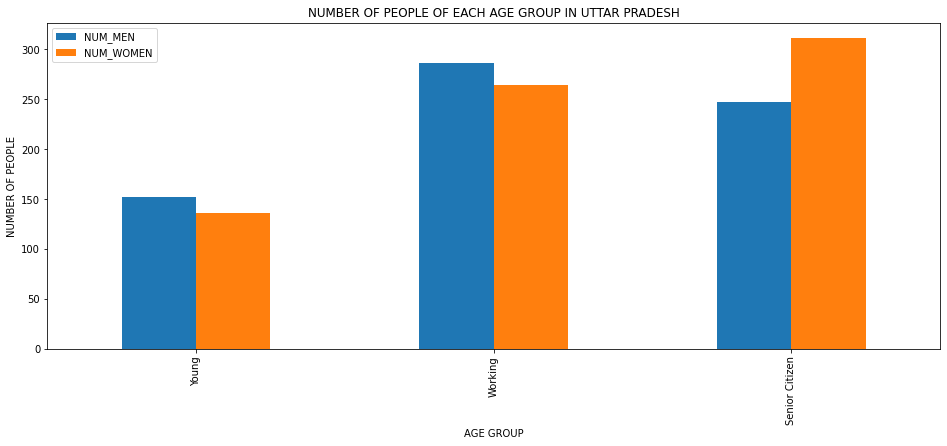

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               121        116
Working             253        262
Senior Citizen      259        250


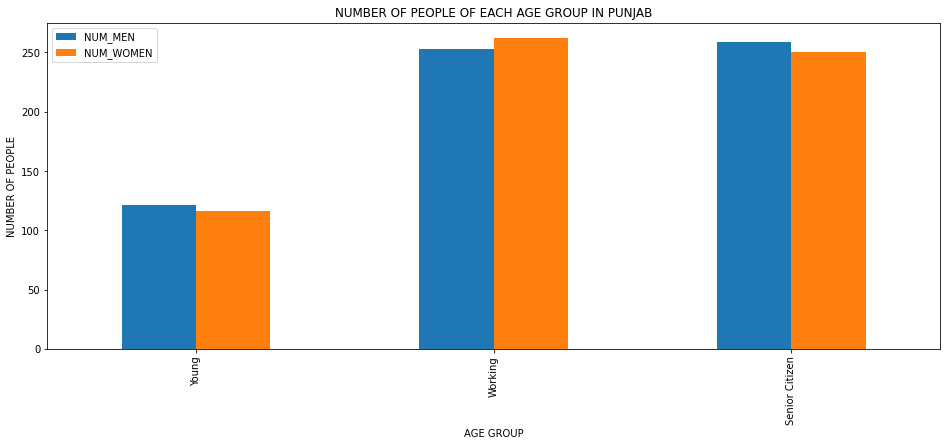

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               104         95
Working             197        187
Senior Citizen      179        202


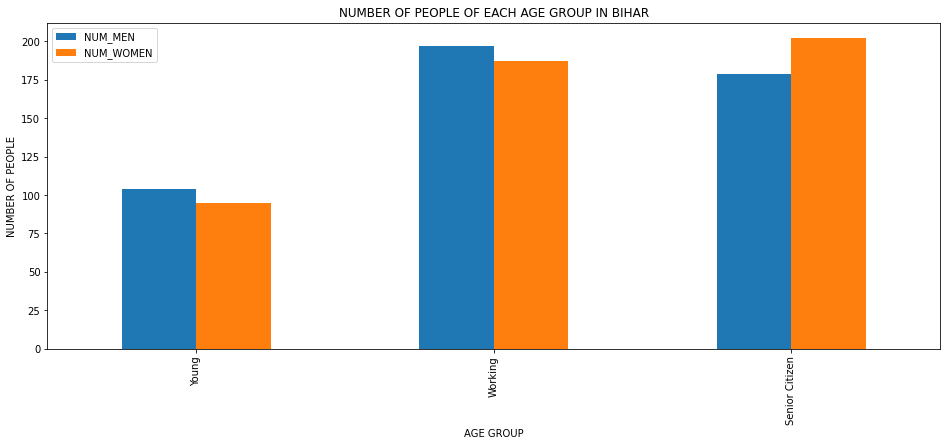

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               150        123
Working             292        292
Senior Citizen      280        250


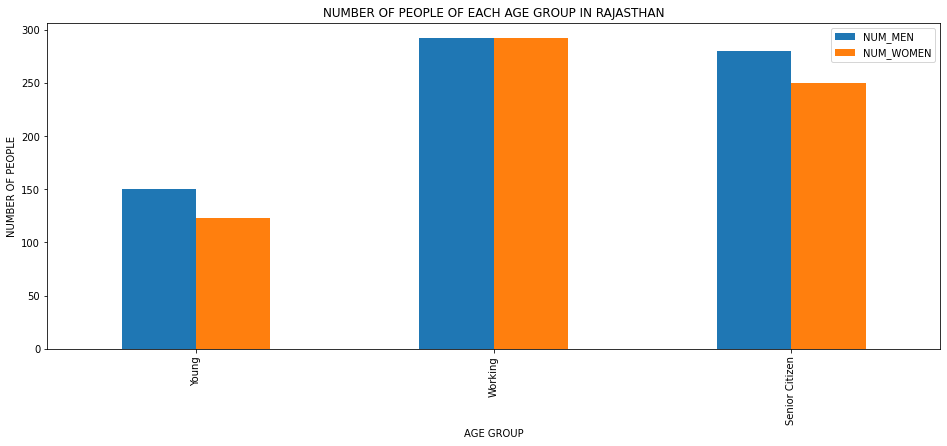

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               116        146
Working             306        275
Senior Citizen      267        255


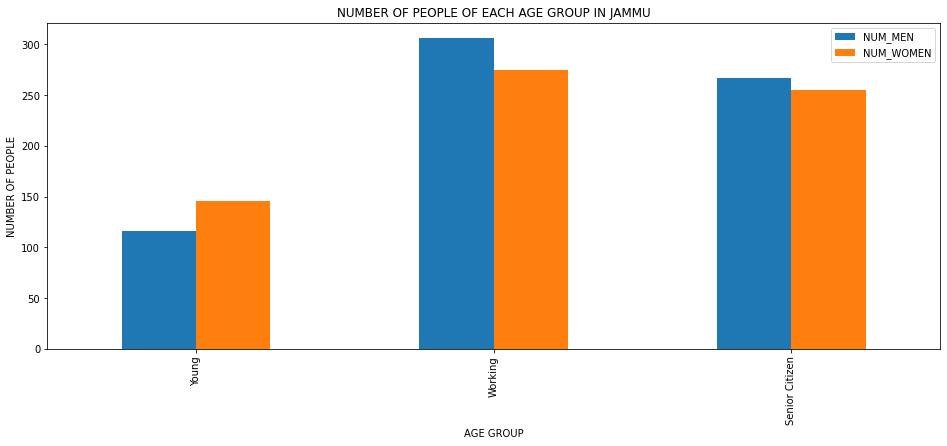

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               118        131
Working             236        257
Senior Citizen      266        267


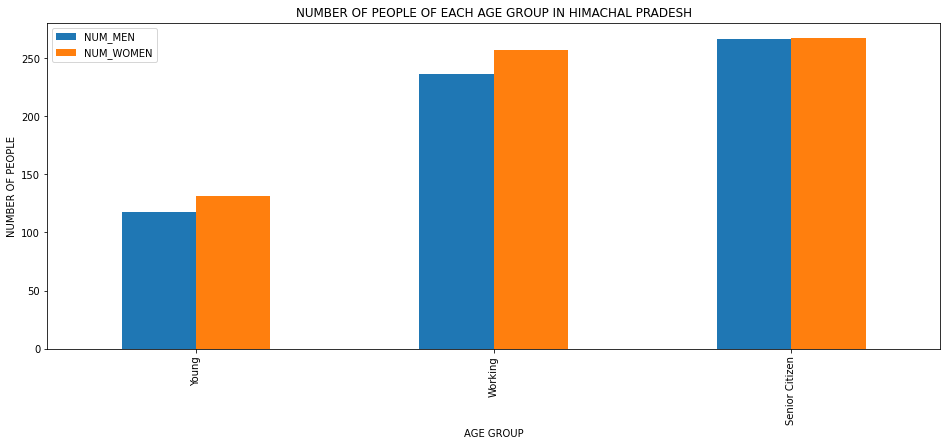

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young                81         98
Working             191        191
Senior Citizen      175        206


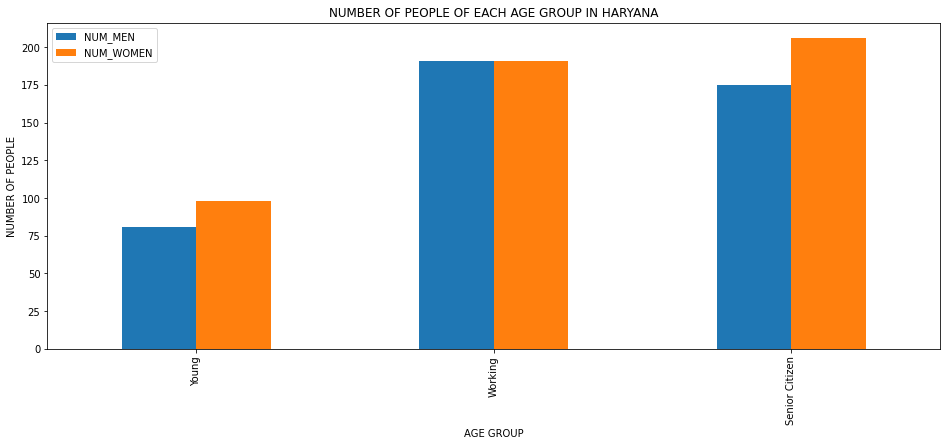

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               103        107
Working             233        198
Senior Citizen      215        260


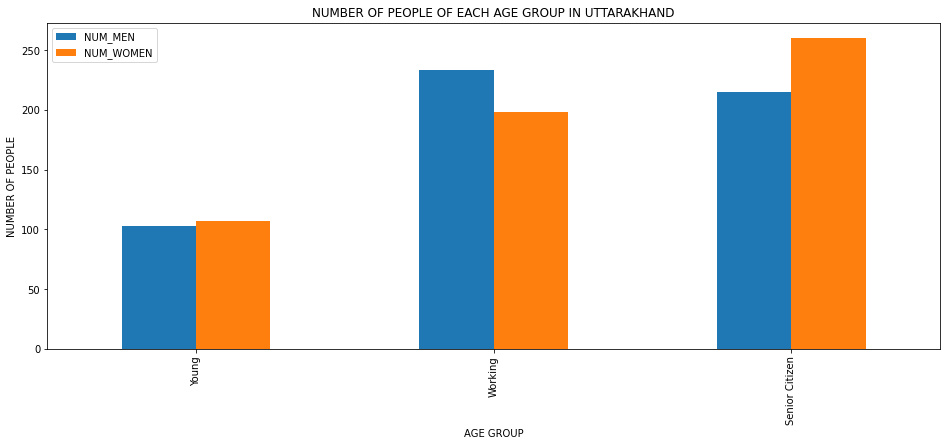

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young                34         31
Working              58         53
Senior Citizen       54         64


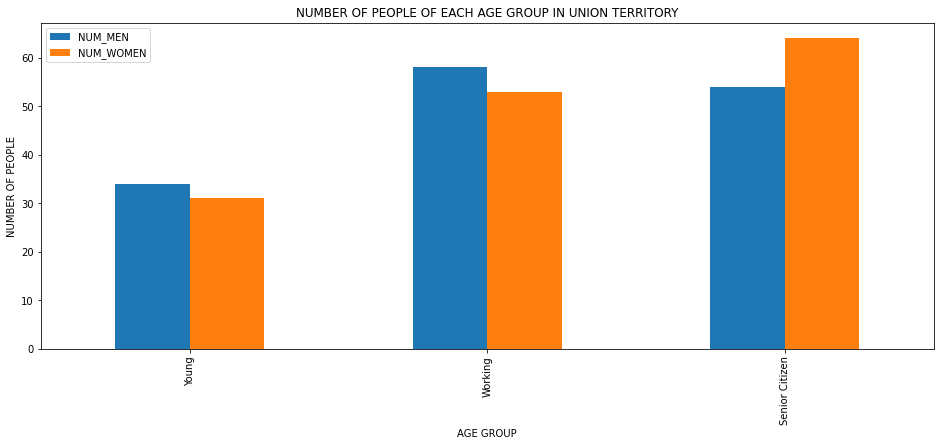

Number of men and women of each age group in Service
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                93        101
Working             196        170
Senior Citizen      190        170


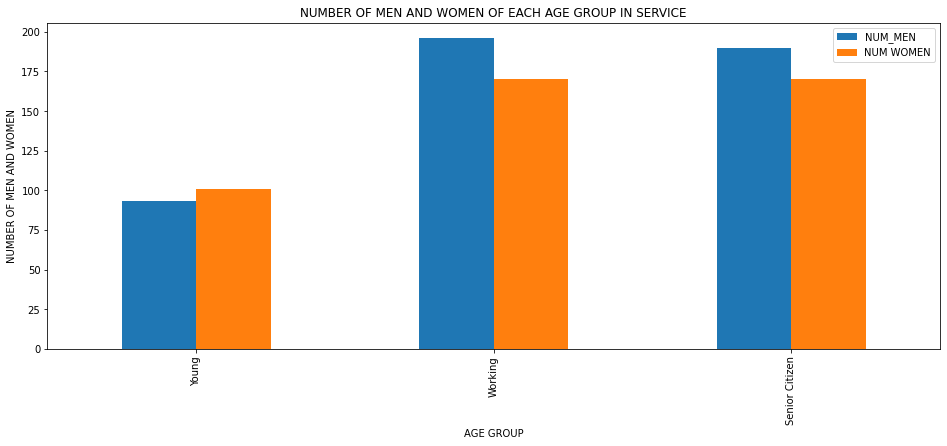

Number of men and women of each age group in Bank
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                87         91
Working             183        153
Senior Citizen      191        185


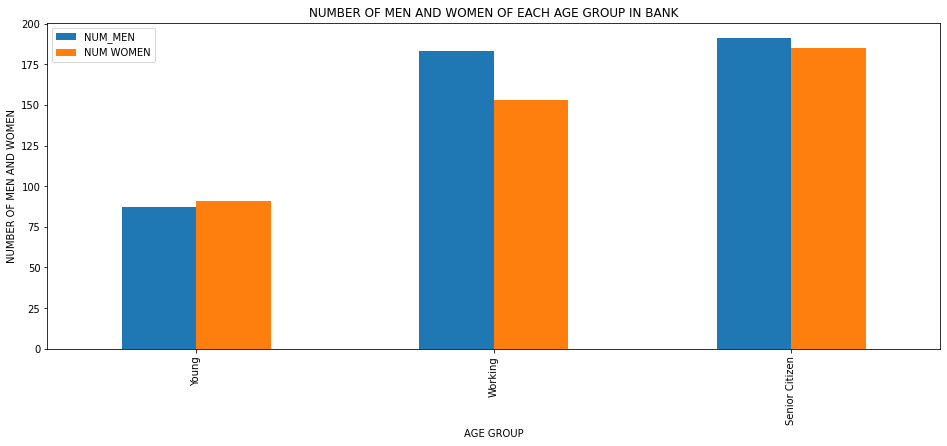

Number of men and women of each age group in Data Scientist
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                98         78
Working             169        158
Senior Citizen      193        203


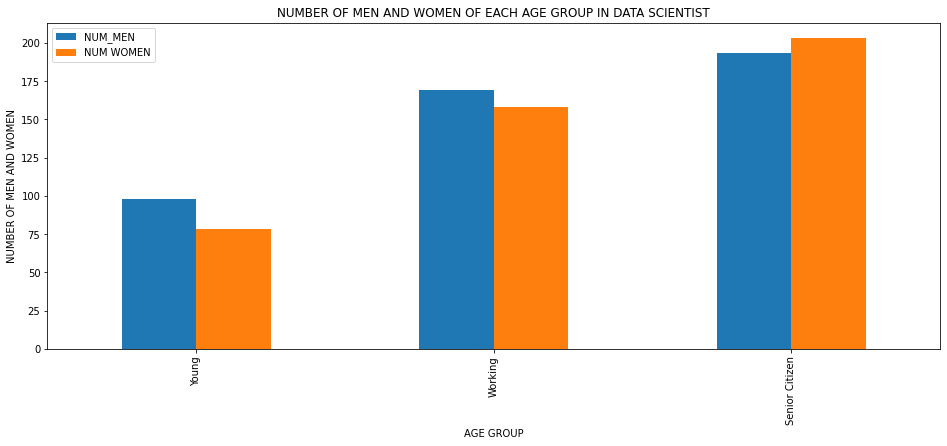

Number of men and women of each age group in CA
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                81        107
Working             189        190
Senior Citizen      153        184


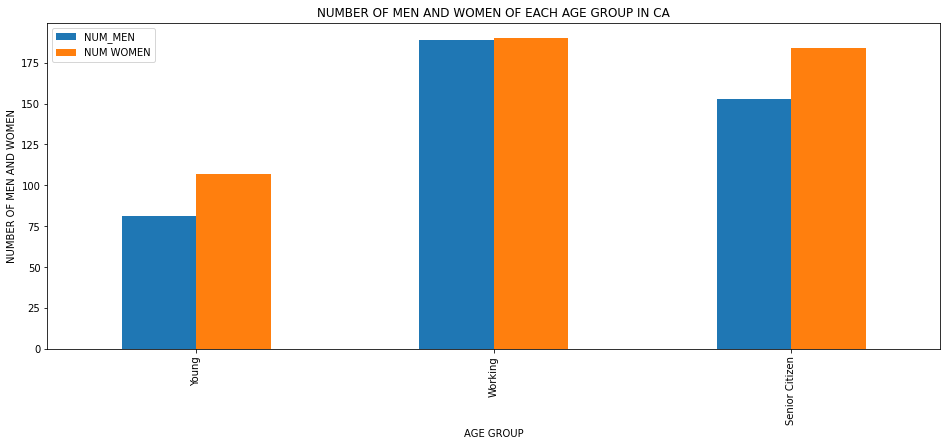

Number of men and women of each age group in Driver
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                79         83
Working             186        204
Senior Citizen      150        187


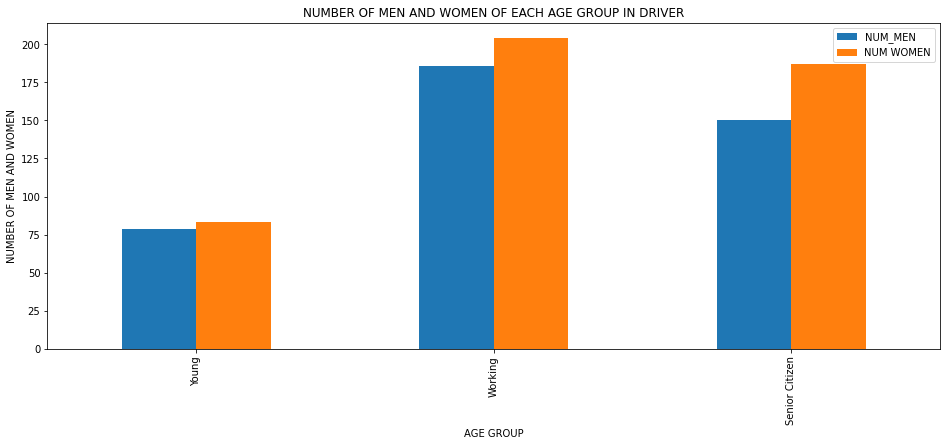

Number of men and women of each age group in Business
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                83         95
Working             198        183
Senior Citizen      175        183


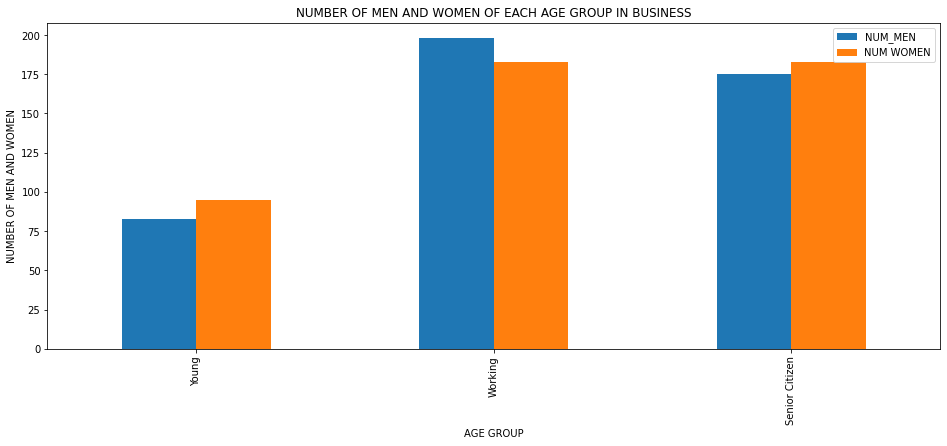

Number of men and women of each age group in Software Engineer
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young               104         85
Working             168        186
Senior Citizen      186        199


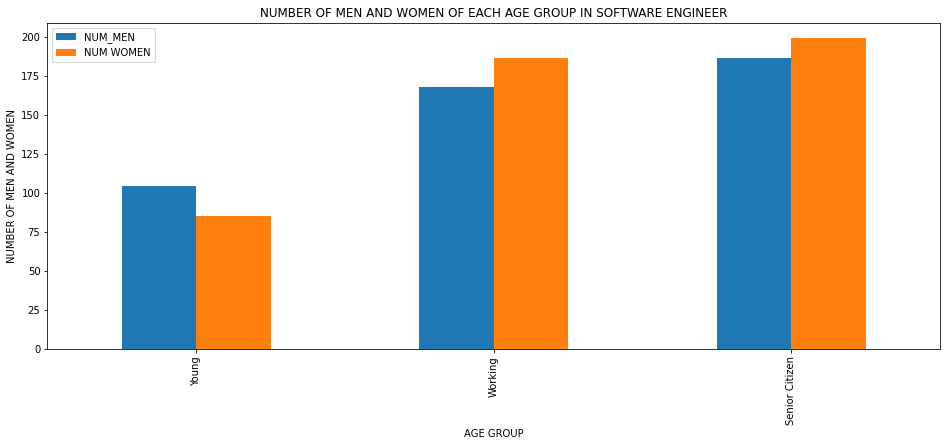

Number of men and women of each age group in Self Employed
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                75         77
Working             194        165
Senior Citizen      192        166


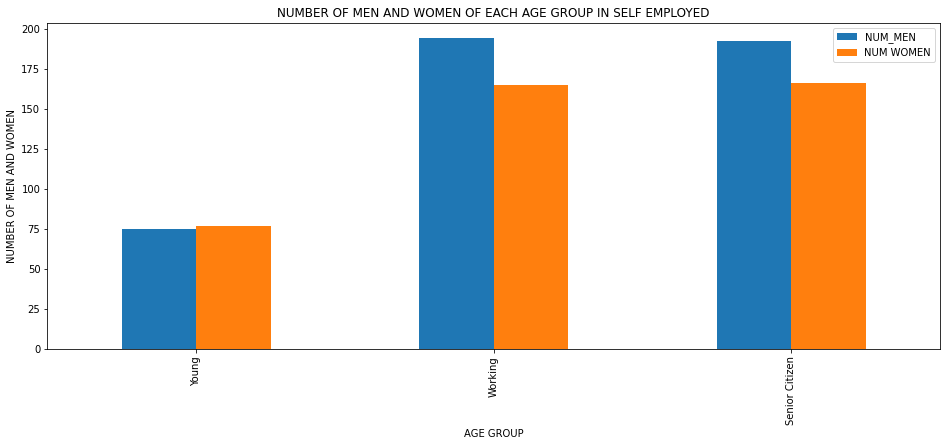

Number of men and women of each age group in Teacher
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                87         83
Working             190        191
Senior Citizen      168        203


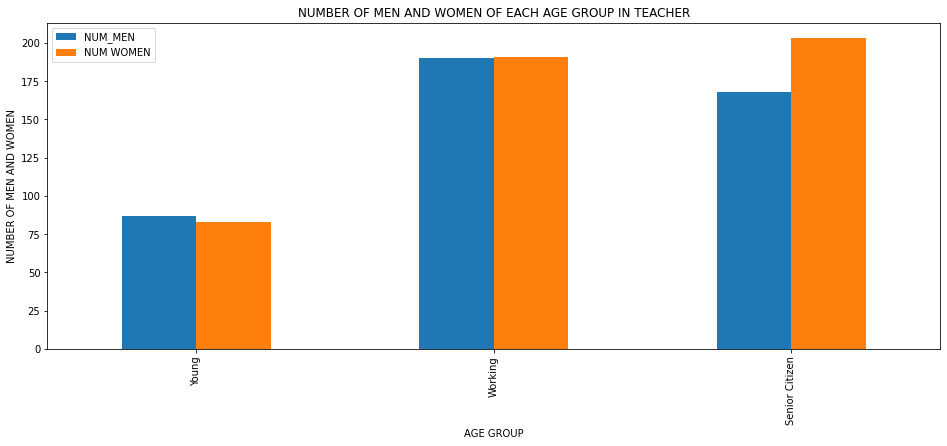

Number of men and women of each age group in Government Job
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                98         82
Working             180        184
Senior Citizen      172        191


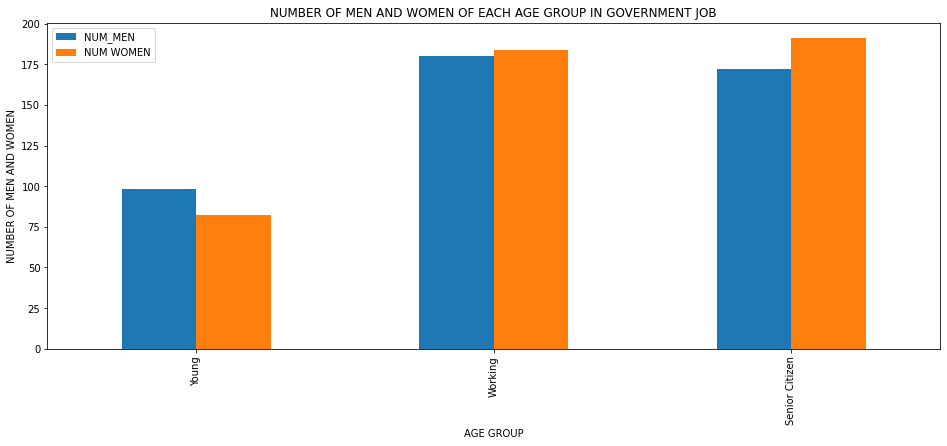

Number of men and women of each age group in MNC
                NUM_MEN  NUM WOMEN
AGE GROUP                         
Young                94        101
Working             199        195
Senior Citizen      172        194


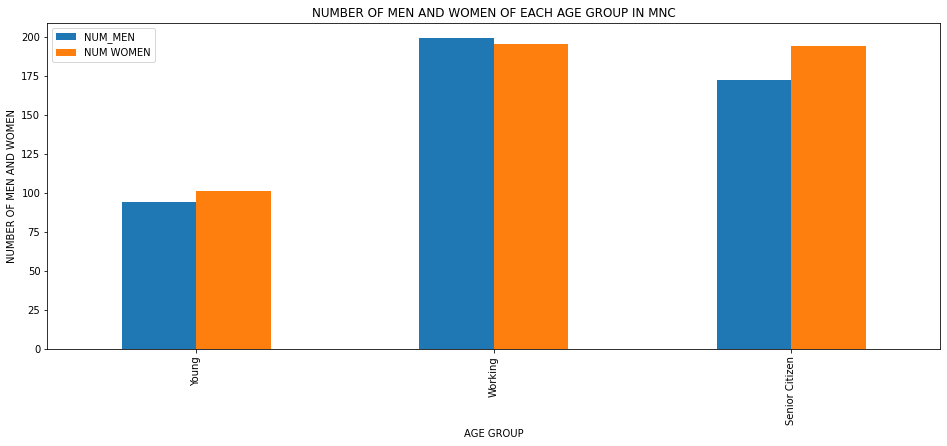

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               114        120
Working             219        212
Senior Citizen      237        225


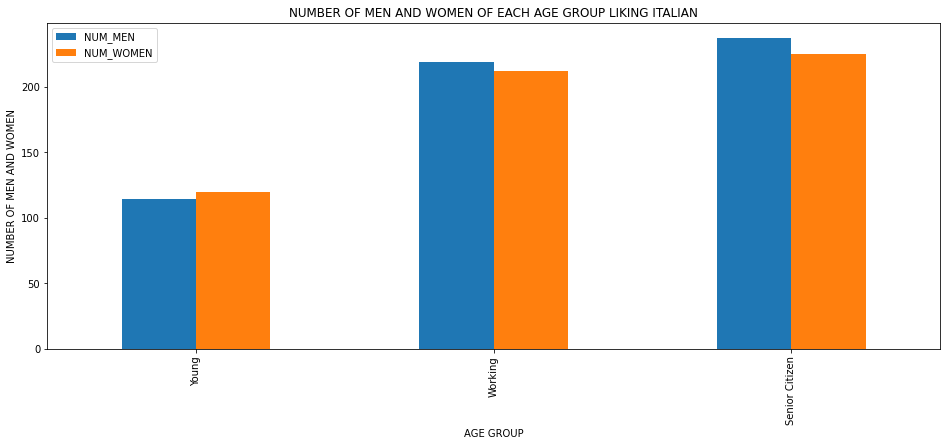

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               116        101
Working             212        226
Senior Citizen      206        206


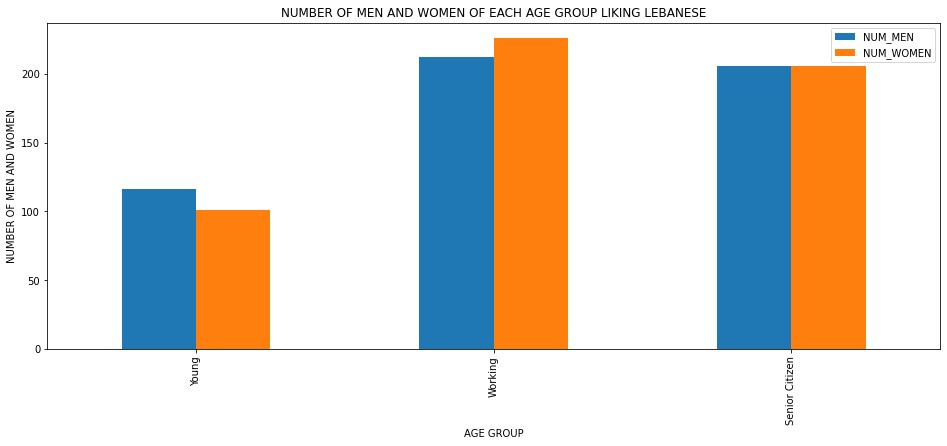

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               110        109
Working             238        247
Senior Citizen      203        234


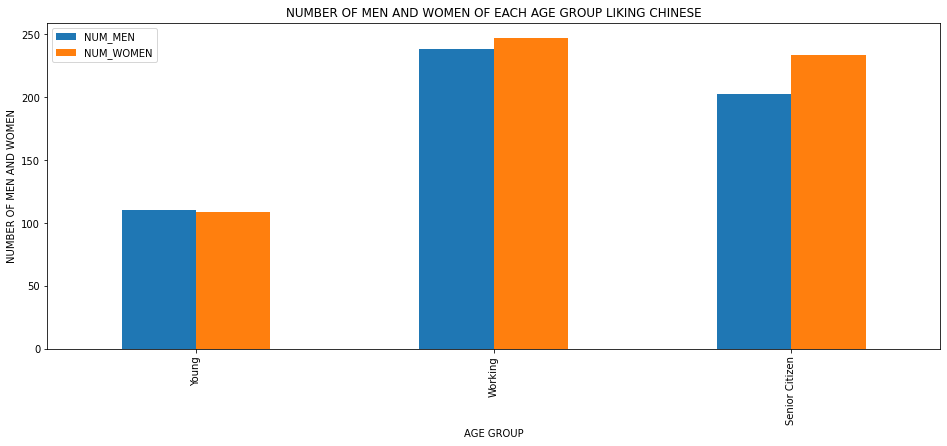

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               114        108
Working             213        208
Senior Citizen      216        232


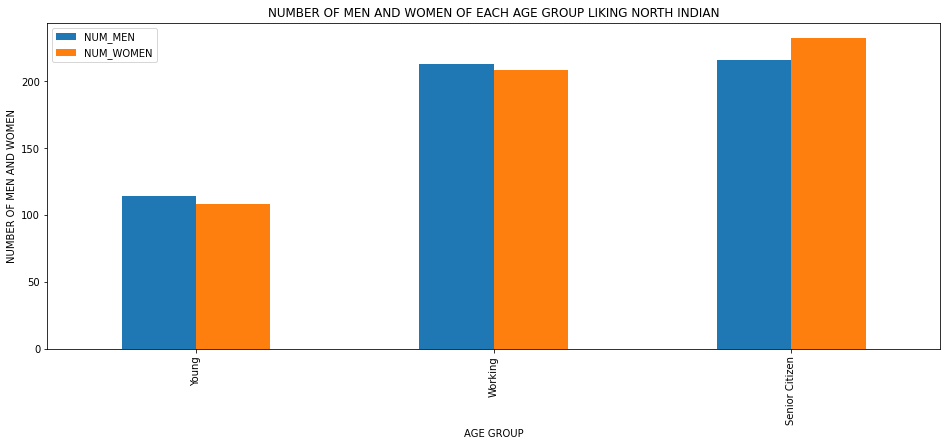

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young                97        113
Working             211        218
Senior Citizen      226        224


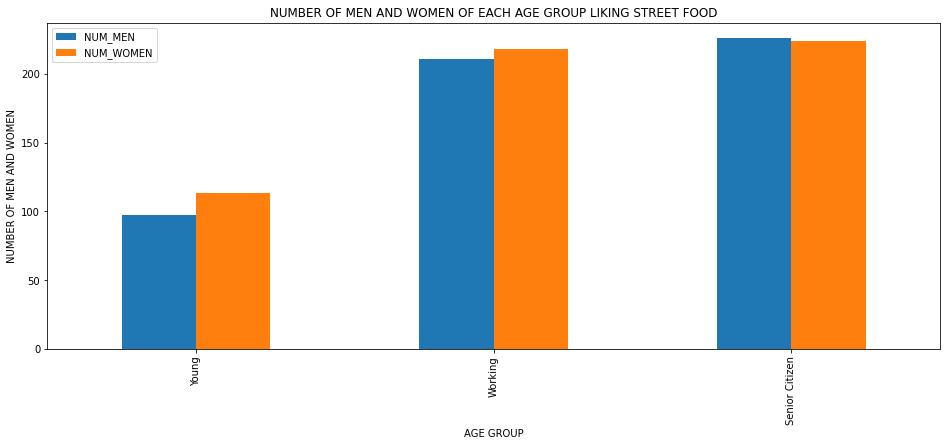

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               114        113
Working             246        218
Senior Citizen      209        225


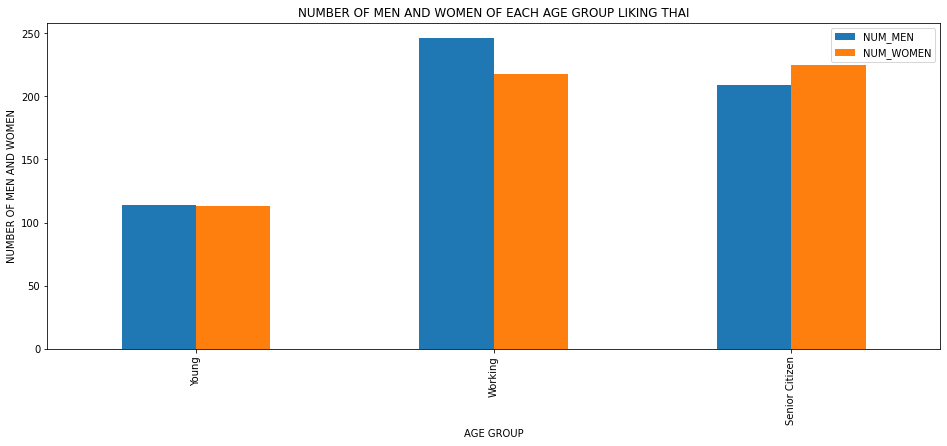

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               107        106
Working             255        225
Senior Citizen      215        223


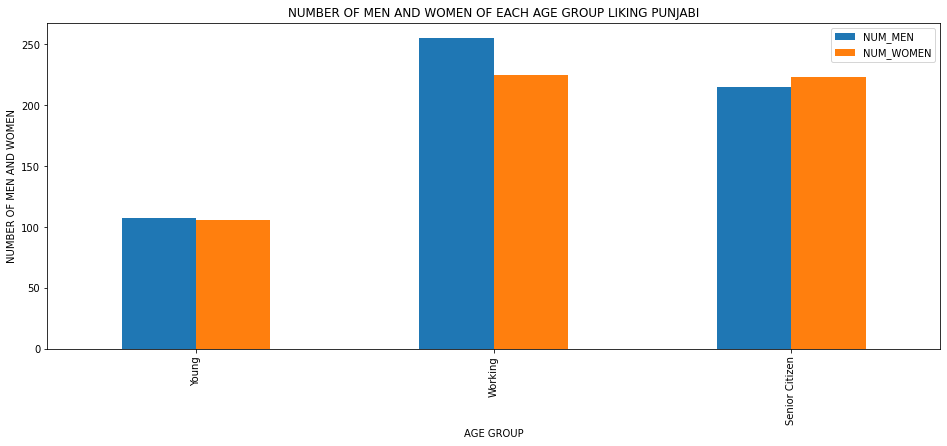

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young               117        114
Working             221        210
Senior Citizen      220        237


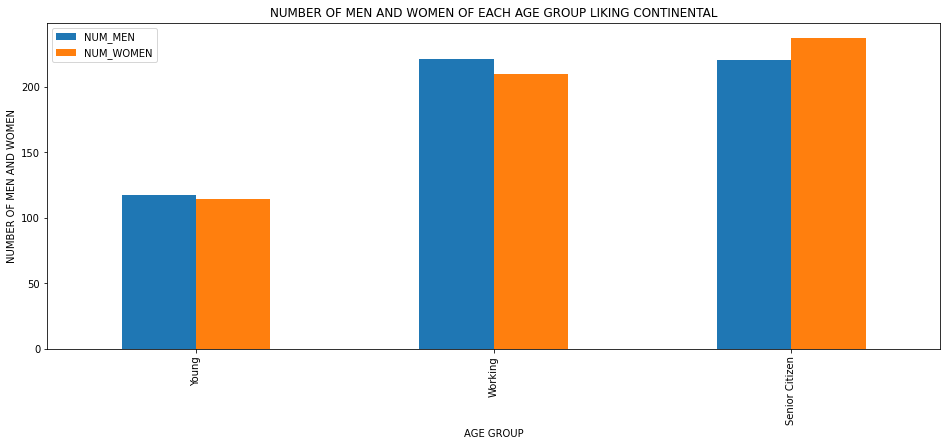

                NUM_MEN  NUM_WOMEN
AGE GROUP                         
Young                90         99
Working             237        215
Senior Citizen      210        259


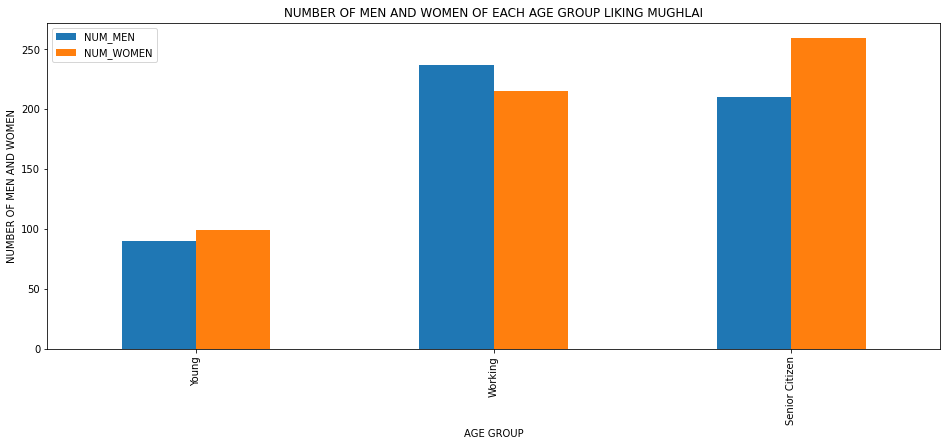

In [7]:
# Number of men and women in the entire population 
print(f'Total population we are studying is {combined.shape[0]}')
print(f'The number of men is {men_df.shape[0]}')
print(f'The number of women is {women_df.shape[0]}')

# Number of men and women of each age group
age_grp_gender = pd.DataFrame(combined.groupby(by=['GENDER','AGE GROUP'])['AGE GROUP'].count())
age_grp_men = age_grp_gender.xs('M').rename(columns={'AGE GROUP':'NUM_MEN'})
age_grp_women = age_grp_gender.xs('F').rename(columns={'AGE GROUP':'NUM_WOMEN'})
age_grp_df = age_grp_men.join(age_grp_women)
print(age_grp_df)

# Number of men and women of each age group in each state 
for state in states:
    state_df = combined[combined['STATE'] == state]
    state_group = pd.DataFrame(state_df.groupby(by=['GENDER','AGE GROUP'])['AGE GROUP'].count())
    state_men = state_group.xs('M').rename(columns={'AGE GROUP':'NUM_MEN'})
    state_women = state_group.xs('F').rename(columns={'AGE GROUP':'NUM_WOMEN'})
    state_comparision = state_men.join(state_women)
    print(state_comparision)
    state_comparision.plot(kind='bar',figsize=(16,6),xlabel='AGE GROUP',ylabel='NUMBER OF PEOPLE',
    title=f'NUMBER OF PEOPLE OF EACH AGE GROUP IN {state.upper()}')
    plt.show()
    
# Number of men and women of each age group in each profession
job_age_df = pd.DataFrame(combined.groupby(by=['GENDER','JOB','AGE GROUP'])['AGE GROUP'].count())
job_age_men = job_age_df.xs('M').rename(columns={'AGE GROUP':'NUM_MEN'})
job_age_women = job_age_df.xs('F').rename(columns={'AGE GROUP':'NUM WOMEN'})
job_age_combined = job_age_men.join(job_age_women)
for job in jobs:
    df_job = job_age_combined.xs(job)
    print(f'Number of men and women of each age group in {job}')
    print(df_job)
    df_job.plot(kind='bar',figsize=(16,6),title= f'NUMBER OF MEN AND WOMEN OF EACH AGE GROUP IN {job.upper()}',
    xlabel='AGE GROUP',ylabel='NUMBER OF MEN AND WOMEN')
    plt.show()
    
# Number of people of each age group liking each food type 
food_df = pd.DataFrame(combined.groupby(by=['GENDER','FOOD_TYPE','AGE GROUP'])['FOOD_TYPE'].count())
food_df_m = food_df.xs('M').rename(columns={'FOOD_TYPE':'NUM_MEN'})
food_df_f = food_df.xs('F').rename(columns={'FOOD_TYPE':'NUM_WOMEN'})
food_df_join = food_df_m.join(food_df_f)
for food in food_types:
    df_food = food_df_join.xs(food)
    print(df_food)
    df_food.plot(kind='bar',figsize=(16,6),xlabel='AGE GROUP',ylabel='NUMBER OF MEN AND WOMEN',title=f'NUMBER OF MEN AND WOMEN OF EACH AGE GROUP LIKING {food.upper()}')
    plt.show()

The are 63 different cities in 9 states
Number of cities in each state
                  NUMBER OF CITIES
STATE                             
Bihar                            6
Haryana                          6
Himachal Pradesh                 8
Jammu                            9
Punjab                           8
Rajasthan                        9
Union Territory                  2
Uttar Pradesh                    9
Uttarakhand                      6
          NUM_MEN  NUM_WOMEN
CITY                        
Abohar         95         81
Agra           83         66
Ajmer          87         66
Alwar          76         85
Ambala         76         85
...           ...        ...
Shimla         86         79
Srinagar       82         67
Udaipur        98         69
Una            79         76
Varanasi       78         82

[63 rows x 2 columns]


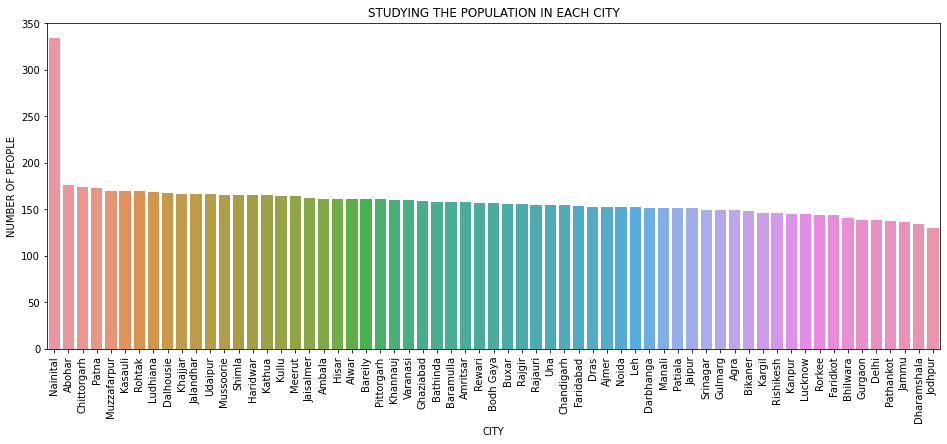

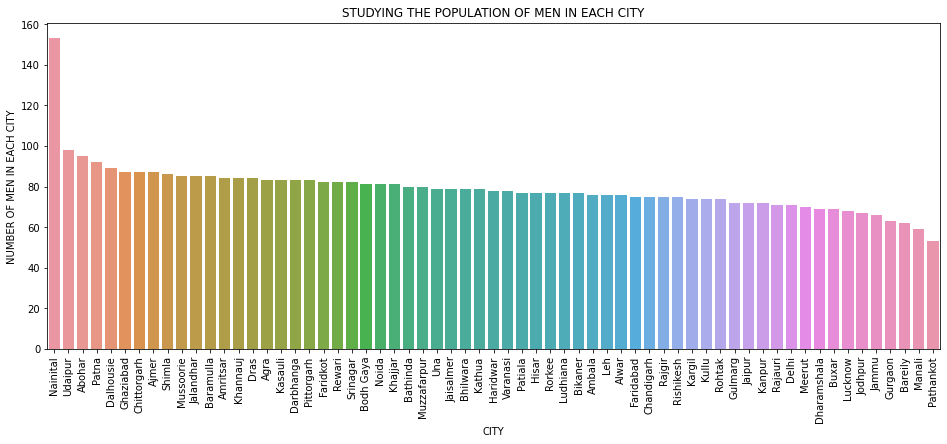

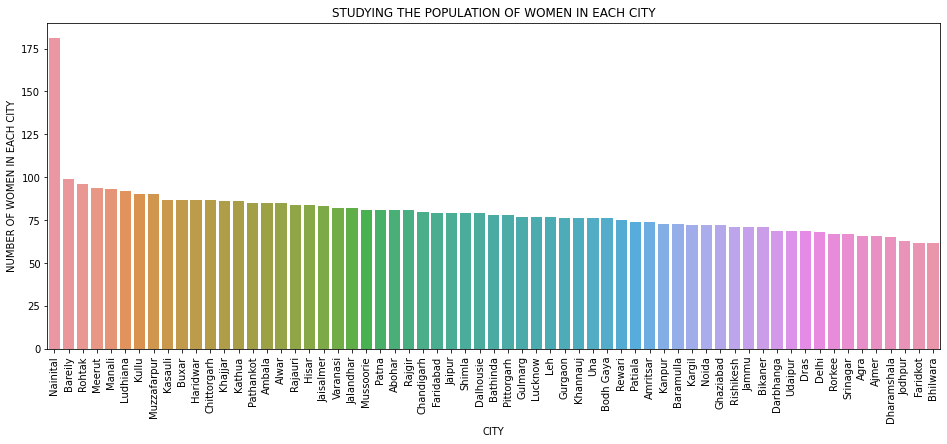

The number of men and women in each state
                  NUM_MEN  NUM_WOMEN
STATE                               
Bihar                 480        484
Haryana               447        495
Himachal Pradesh      620        655
Jammu                 689        676
Punjab                633        628
Rajasthan             722        665
Union Territory       146        148
Uttar Pradesh         685        711
Uttarakhand           551        565


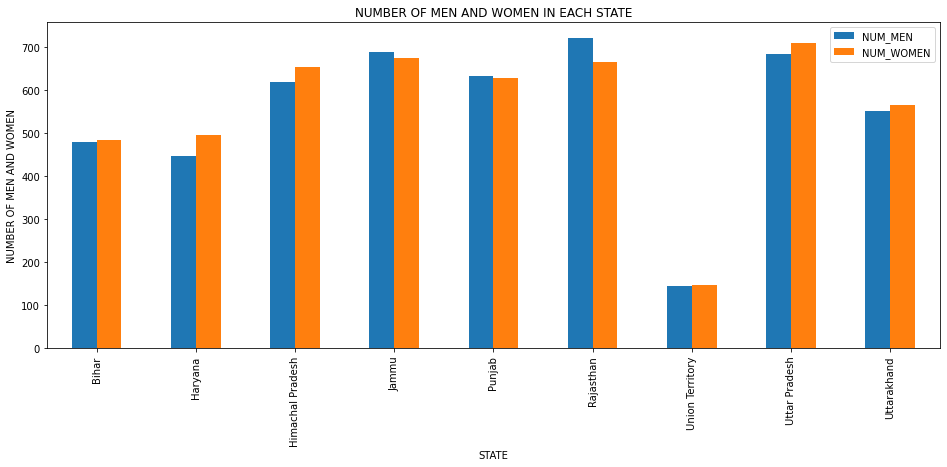

Analysing Uttar Pradesh
The number of cities in this state are 9
The prominent cities in this state are
['Khannauj' 'Bareily' 'Kanpur' 'Agra' 'Varanasi' 'Noida' 'Lucknow'
 'Ghaziabad' 'Meerut']
The number of men and women in Uttar Pradesh are
        COUNT
GENDER       
F         711
M         685
The food type that the entire population of the state likes
              FOOD_TYPE
Punjabi             169
North Indian        161
Thai                158
Chinese             157
Italian             154
Mughlai             152
Lebanese            151
Street Food         148
Continental         146


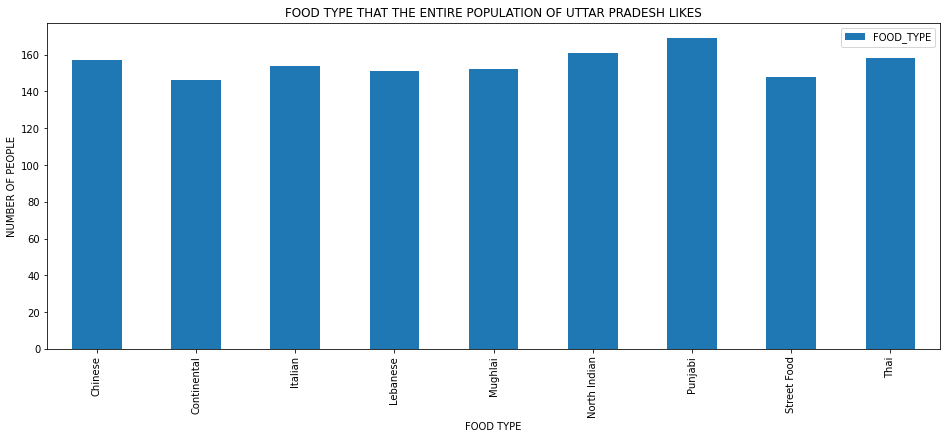

The number of men and women in Uttar Pradesh liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            74         83
Continental        77         69
Italian            73         81
Lebanese           75         76
Mughlai            75         77
North Indian       81         80
Punjabi            91         78
Street Food        60         88
Thai               79         79


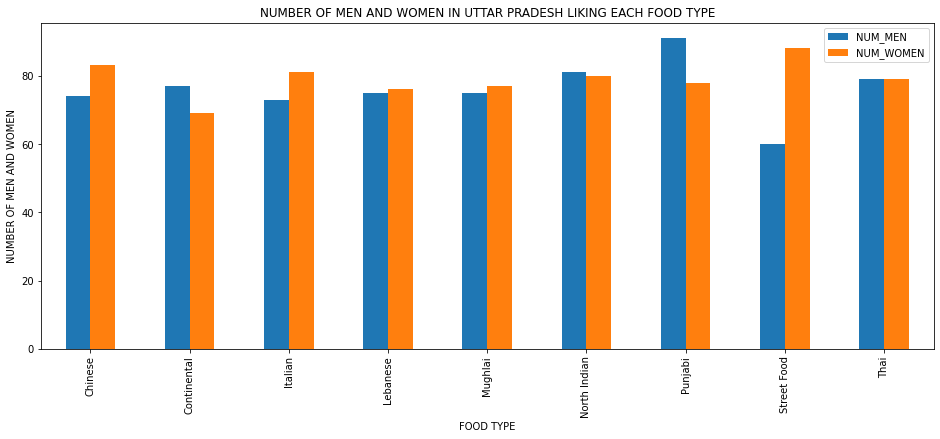

Job pursued by men and women in Uttar Pradesh are:
                   JOB
MNC                146
Software Engineer  142
CA                 138
Service            127
Data Scientist     126
Business           124
Driver             120
Bank               119
Self Employed      119
Government Job     118
Teacher            117


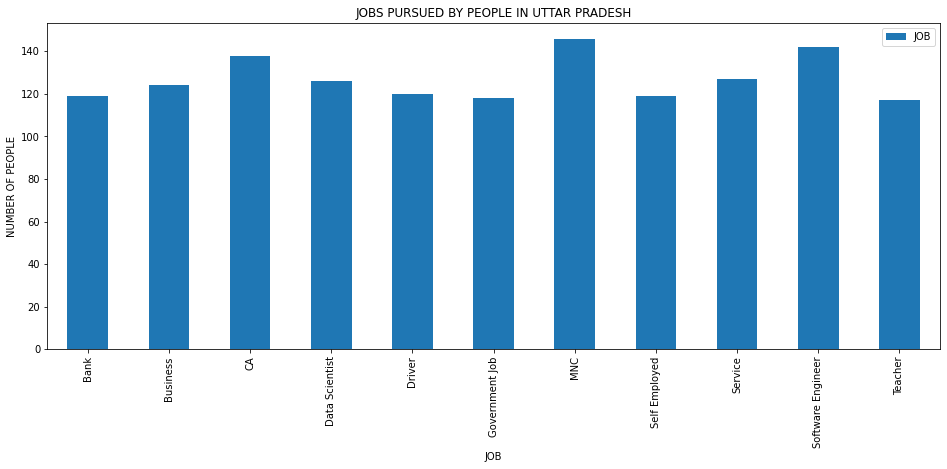

The job pursued in Uttar Pradesh by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          65               54
Business                      59               65
CA                            72               66
Data Scientist                57               69
Driver                        57               63
Government Job                63               55
MNC                           69               77
Self Employed                 59               60
Service                       59               68
Software Engineer             70               72
Teacher                       55               62


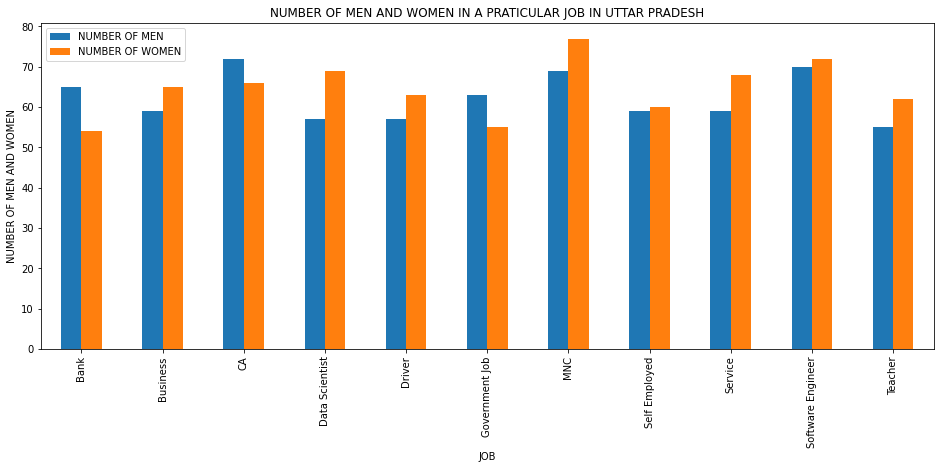

Analysing Punjab
The number of cities in this state are 8
The prominent cities in this state are
['Patiala' 'Faridkot' 'Amritsar' 'Bathinda' 'Pathankot' 'Abohar'
 'Ludhiana' 'Jalandhar']
The number of men and women in Punjab are
        COUNT
GENDER       
F         628
M         633
The food type that the entire population of the state likes
              FOOD_TYPE
Lebanese            151
North Indian        149
Continental         144
Italian             143
Mughlai             140
Punjabi             138
Thai                137
Chinese             136
Street Food         123


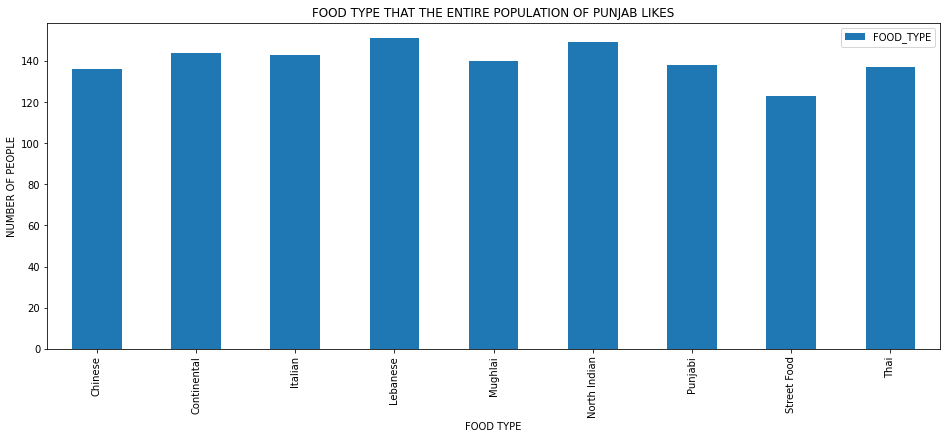

The number of men and women in Punjab liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            65         71
Continental        69         75
Italian            69         74
Lebanese           77         74
Mughlai            65         75
North Indian       84         65
Punjabi            67         71
Street Food        65         58
Thai               72         65


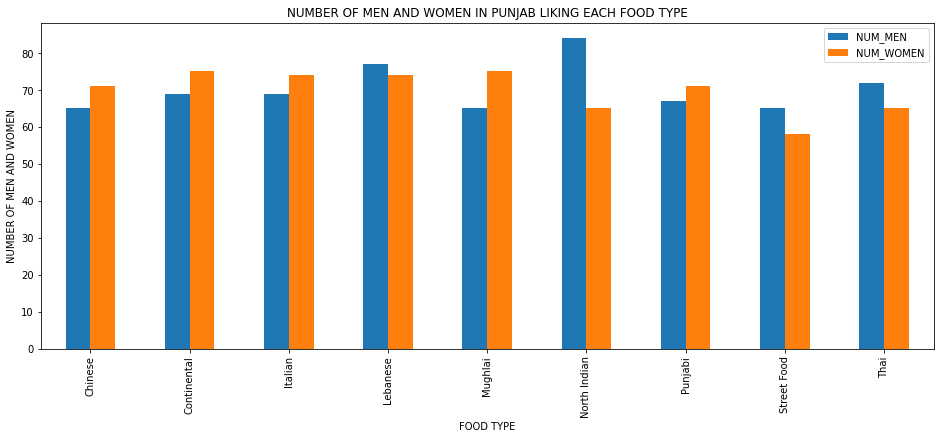

Job pursued by men and women in Punjab are:
                   JOB
Service            132
Driver             127
Teacher            125
Government Job     121
Self Employed      121
Business           117
Software Engineer  111
MNC                110
CA                 110
Data Scientist      96
Bank                91


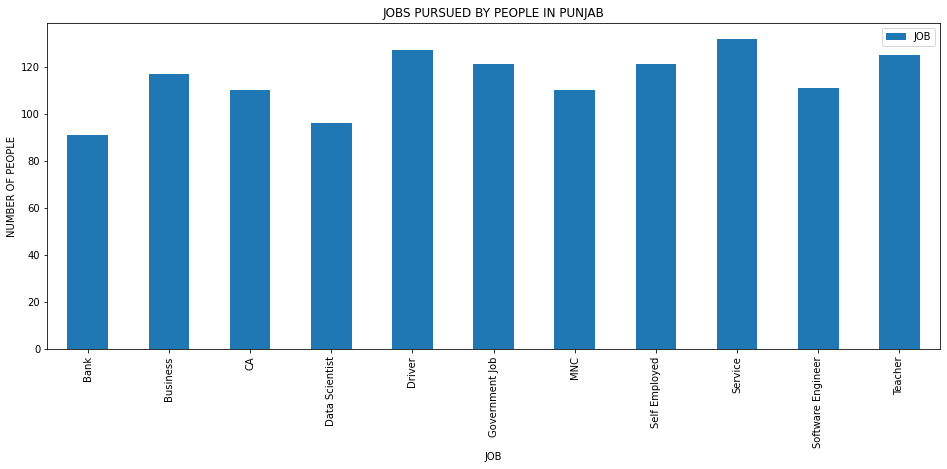

The job pursued in Punjab by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          52               39
Business                      63               54
CA                            50               60
Data Scientist                55               41
Driver                        64               63
Government Job                62               59
MNC                           48               62
Self Employed                 61               60
Service                       68               64
Software Engineer             52               59
Teacher                       58               67


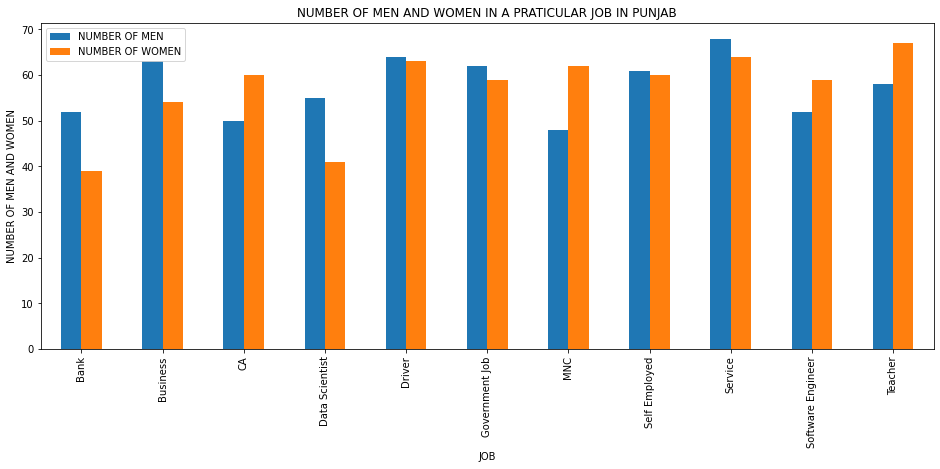

Analysing Bihar
The number of cities in this state are 6
The prominent cities in this state are
['Buxar' 'Bodh Gaya' 'Muzzafarpur' 'Rajgir' 'Patna' 'Darbhanga']
The number of men and women in Bihar are
        COUNT
GENDER       
F         484
M         480
The food type that the entire population of the state likes
              FOOD_TYPE
Street Food         130
Mughlai             117
Continental         110
Thai                108
Lebanese            107
Italian             105
Chinese              99
Punjabi              98
North Indian         90


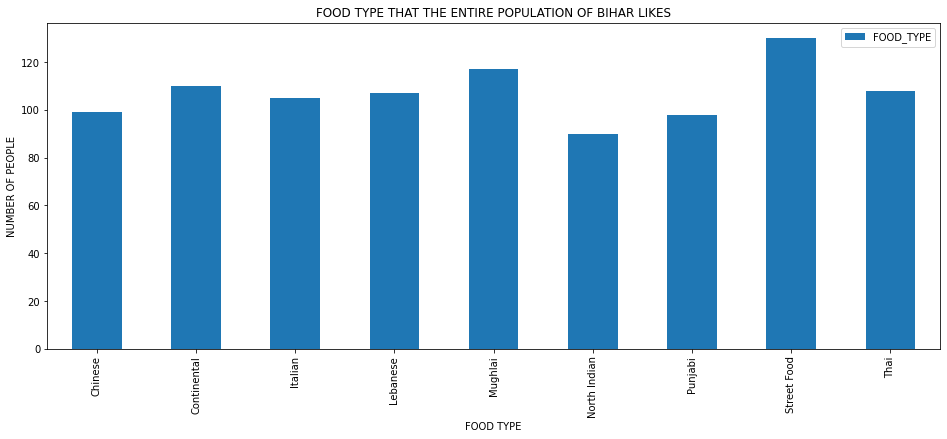

The number of men and women in Bihar liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            45         54
Continental        55         55
Italian            49         56
Lebanese           52         55
Mughlai            64         53
North Indian       37         53
Punjabi            48         50
Street Food        71         59
Thai               59         49


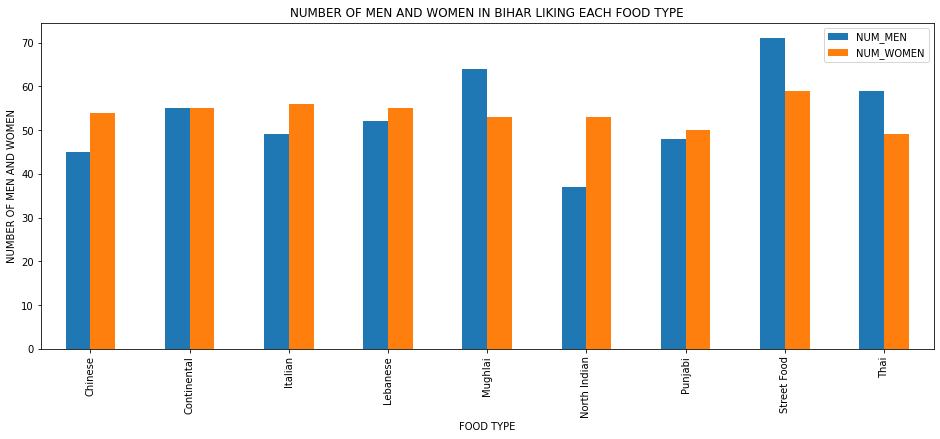

Job pursued by men and women in Bihar are:
                   JOB
Bank                95
Teacher             94
Business            90
Service             90
MNC                 89
CA                  88
Software Engineer   86
Self Employed       86
Data Scientist      85
Government Job      84
Driver              77


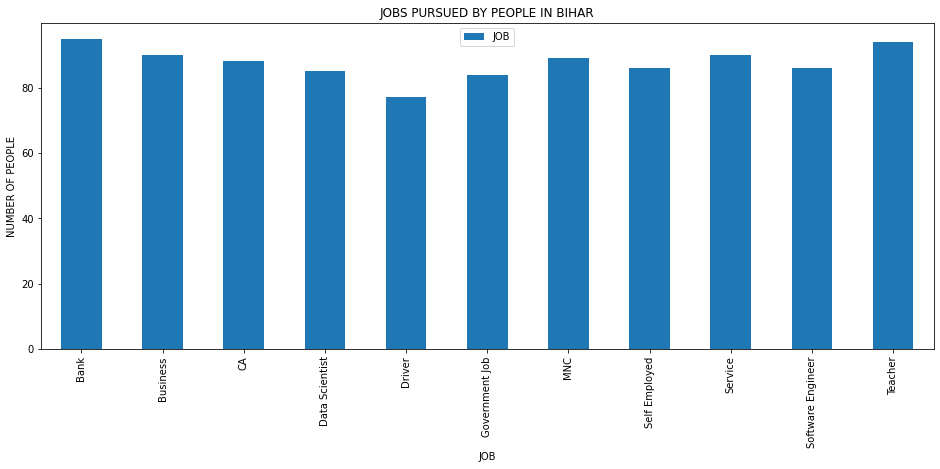

The job pursued in Bihar by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          50               45
Business                      48               42
CA                            38               50
Data Scientist                40               45
Driver                        33               44
Government Job                36               48
MNC                           50               39
Self Employed                 48               38
Service                       51               39
Software Engineer             38               48
Teacher                       48               46


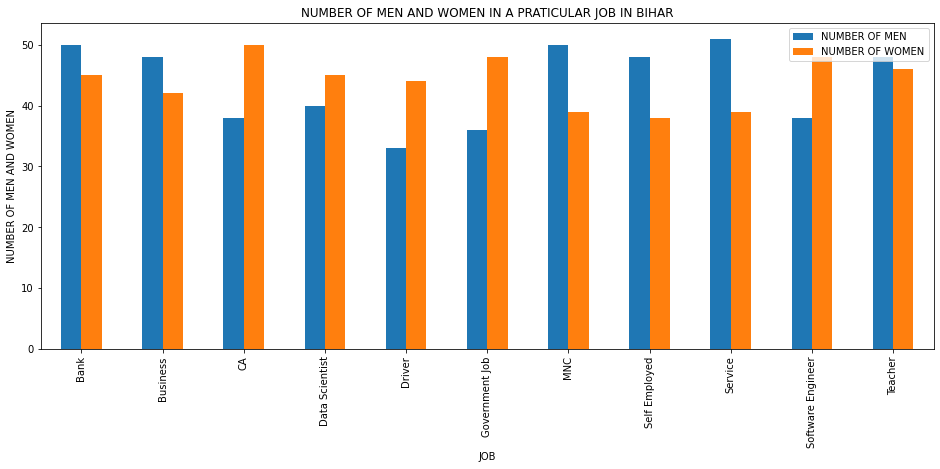

Analysing Rajasthan
The number of cities in this state are 9
The prominent cities in this state are
['Jaisalmer' 'Udaipur' 'Bhilwara' 'Bikaner' 'Jaipur' 'Chittorgarh'
 'Jodhpur' 'Ajmer' 'Alwar']
The number of men and women in Rajasthan are
        COUNT
GENDER       
F         665
M         722
The food type that the entire population of the state likes
              FOOD_TYPE
Italian             175
Continental         167
Street Food         160
Thai                157
Punjabi             156
Mughlai             150
Lebanese            146
North Indian        146
Chinese             130


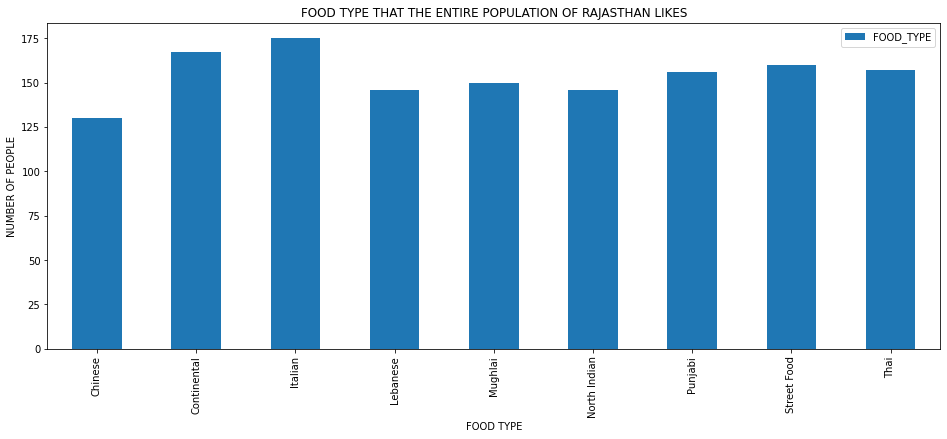

The number of men and women in Rajasthan liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            72         58
Continental        90         77
Italian            90         85
Lebanese           79         67
Mughlai            77         73
North Indian       81         65
Punjabi            81         75
Street Food        76         84
Thai               76         81


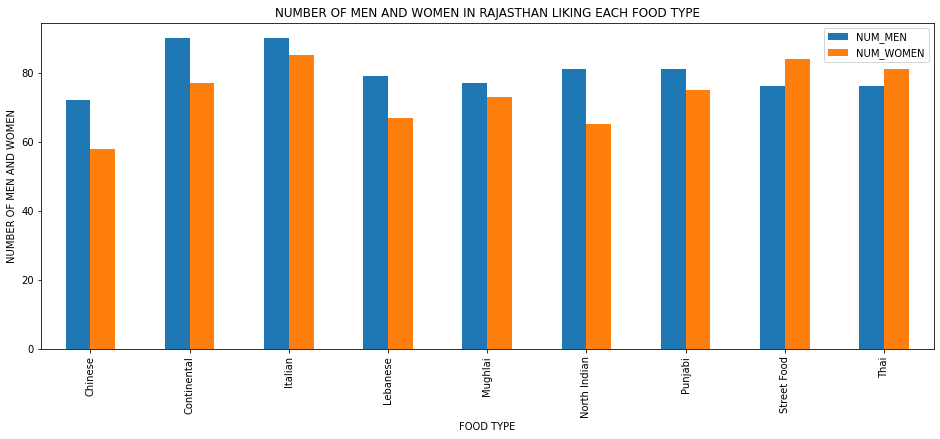

Job pursued by men and women in Rajasthan are:
                   JOB
Data Scientist     156
Business           130
CA                 127
Teacher            126
Software Engineer  125
Self Employed      125
Driver             124
Government Job     124
Bank               120
MNC                115
Service            115


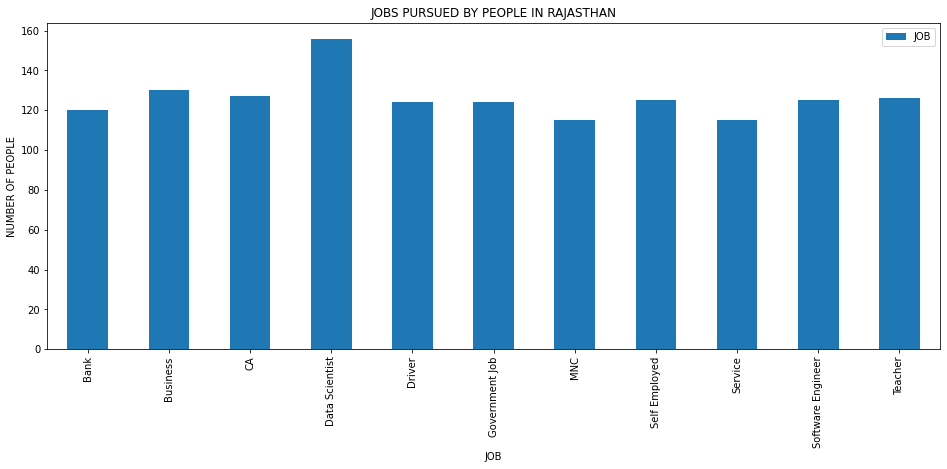

The job pursued in Rajasthan by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          68               52
Business                      69               61
CA                            60               67
Data Scientist                78               78
Driver                        54               70
Government Job                59               65
MNC                           69               46
Self Employed                 66               59
Service                       71               44
Software Engineer             67               58
Teacher                       61               65


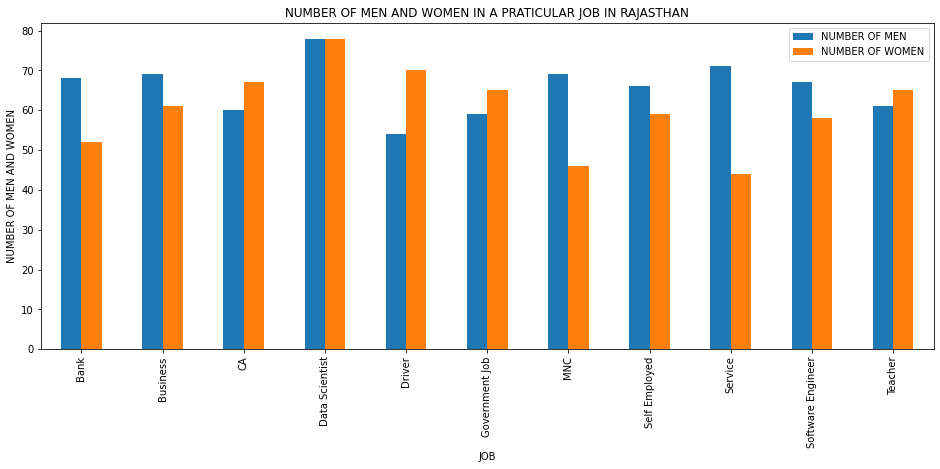

Analysing Jammu
The number of cities in this state are 9
The prominent cities in this state are
['Baramulla' 'Kathua' 'Jammu' 'Gulmarg' 'Srinagar' 'Dras' 'Kargil'
 'Rajauri' 'Leh']
The number of men and women in Jammu are
        COUNT
GENDER       
F         676
M         689
The food type that the entire population of the state likes
              FOOD_TYPE
Thai                171
Italian             156
Punjabi             155
Street Food         155
North Indian        151
Chinese             150
Mughlai             147
Continental         142
Lebanese            138


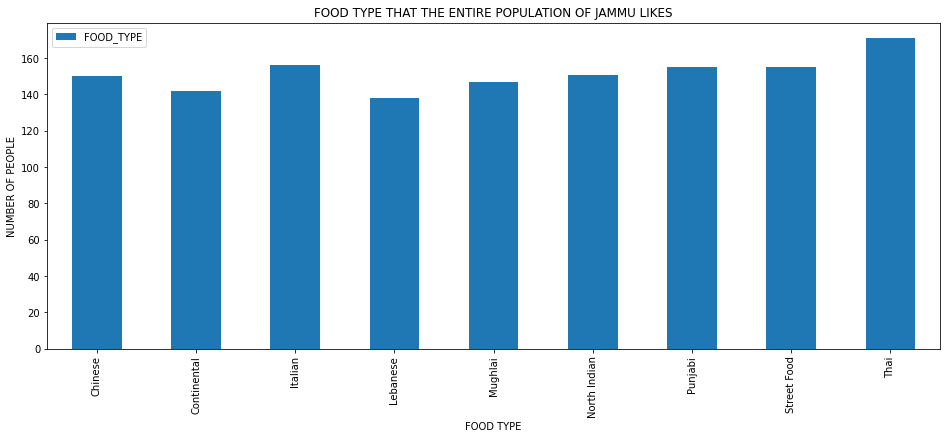

The number of men and women in Jammu liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            68         82
Continental        78         64
Italian            83         73
Lebanese           59         79
Mughlai            76         71
North Indian       79         72
Punjabi            74         81
Street Food        75         80
Thai               97         74


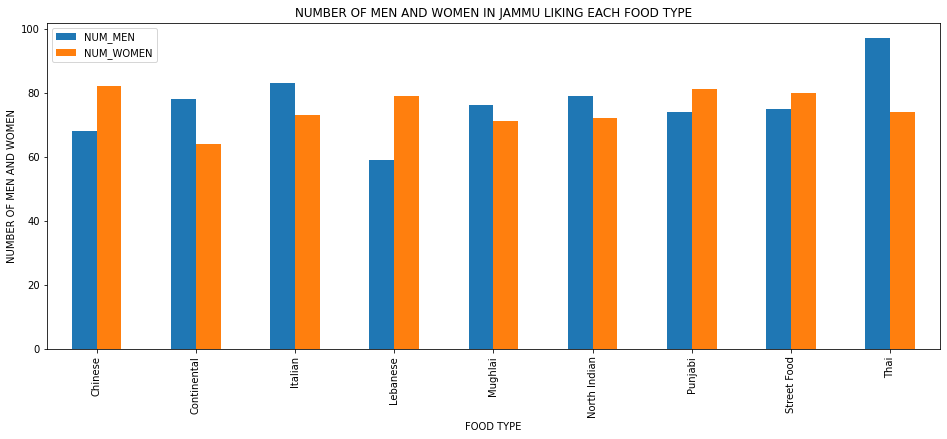

Job pursued by men and women in Jammu are:
                   JOB
MNC                143
Business           132
Software Engineer  128
Bank               128
Teacher            128
Government Job     123
Driver             122
CA                 121
Data Scientist     118
Service            116
Self Employed      106


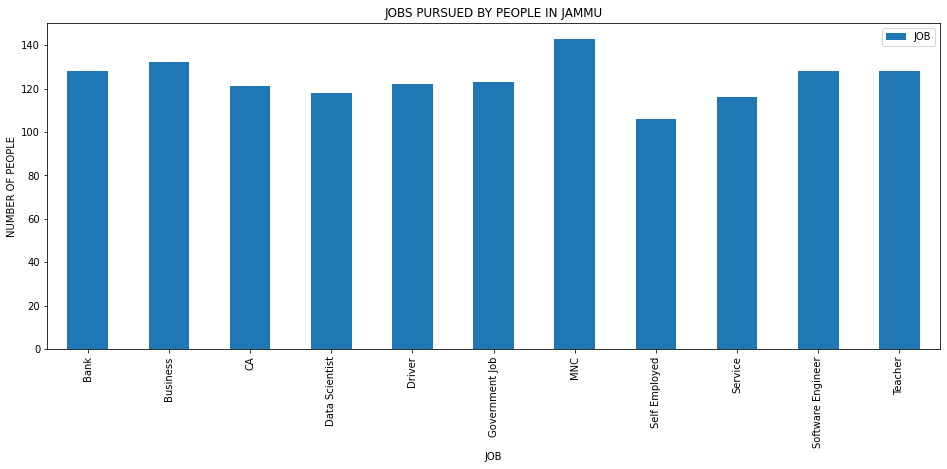

The job pursued in Jammu by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          61               67
Business                      68               64
CA                            59               62
Data Scientist                62               56
Driver                        56               66
Government Job                60               63
MNC                           77               66
Self Employed                 59               47
Service                       63               53
Software Engineer             65               63
Teacher                       59               69


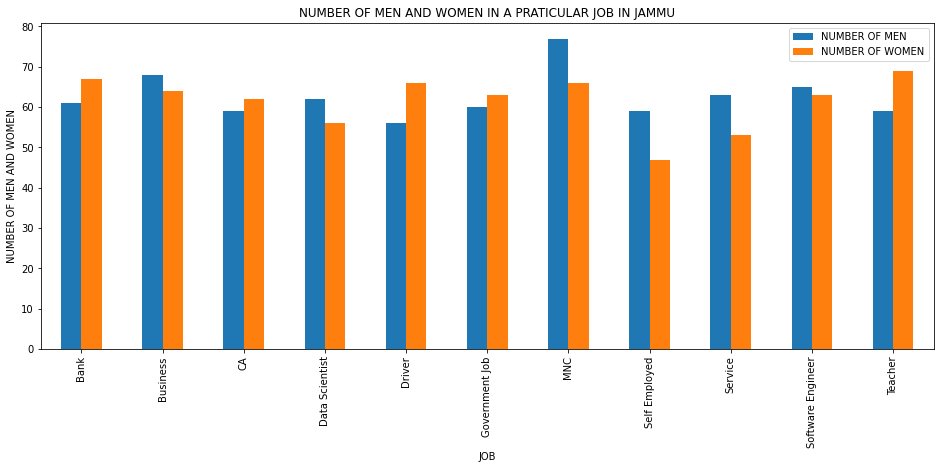

Analysing Himachal Pradesh
The number of cities in this state are 8
The prominent cities in this state are
['Dalhousie' 'Khajjar' 'Kullu' 'Manali' 'Dharamshala' 'Shimla' 'Kasauli'
 'Una']
The number of men and women in Himachal Pradesh are
        COUNT
GENDER       
F         655
M         620
The food type that the entire population of the state likes
              FOOD_TYPE
Punjabi             167
Continental         157
Chinese             152
Street Food         137
Thai                135
Mughlai             135
Lebanese            132
North Indian        131
Italian             129


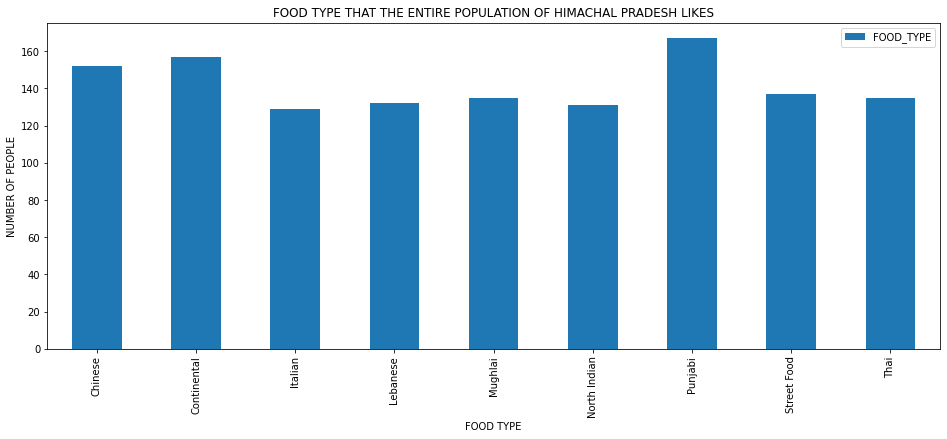

The number of men and women in Himachal Pradesh liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            74         78
Continental        70         87
Italian            63         66
Lebanese           63         69
Mughlai            57         78
North Indian       66         65
Punjabi            85         82
Street Food        77         60
Thai               65         70


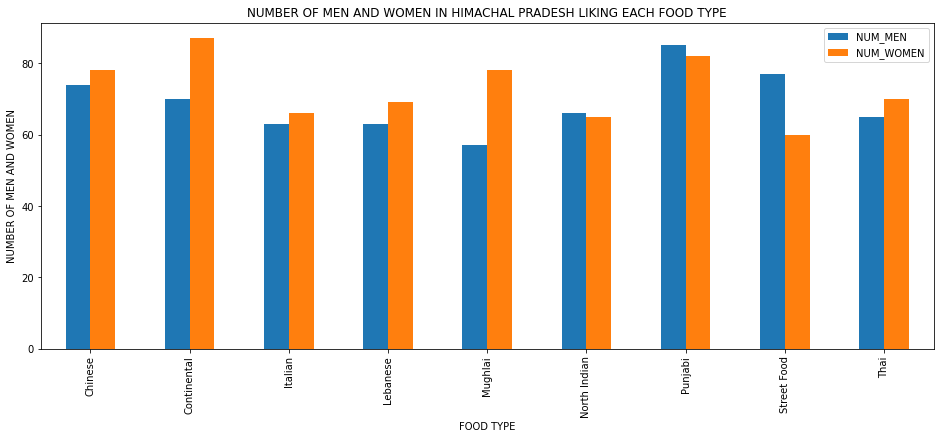

Job pursued by men and women in Himachal Pradesh are:
                   JOB
Driver             128
Business           126
Government Job     126
MNC                123
Teacher            120
Bank               119
CA                 112
Service            110
Software Engineer  108
Data Scientist     103
Self Employed      100


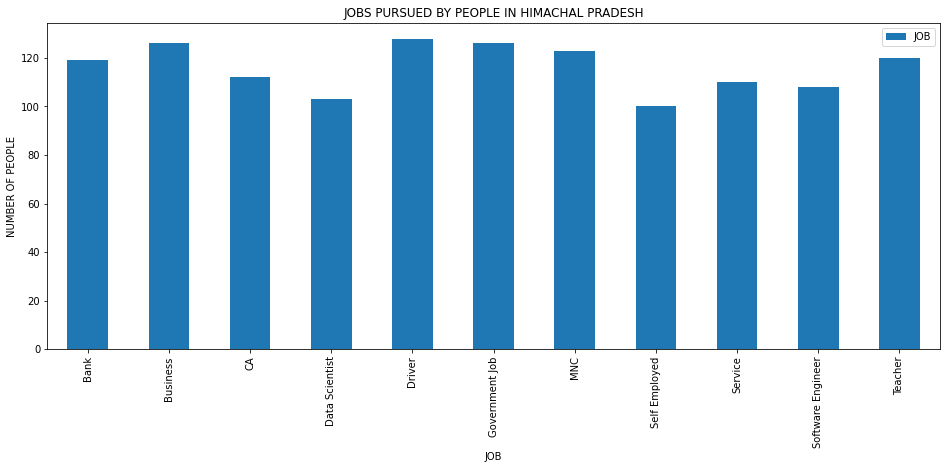

The job pursued in Himachal Pradesh by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          58               61
Business                      56               70
CA                            56               56
Data Scientist                55               48
Driver                        60               68
Government Job                66               60
MNC                           51               72
Self Employed                 52               48
Service                       54               56
Software Engineer             54               54
Teacher                       58               62


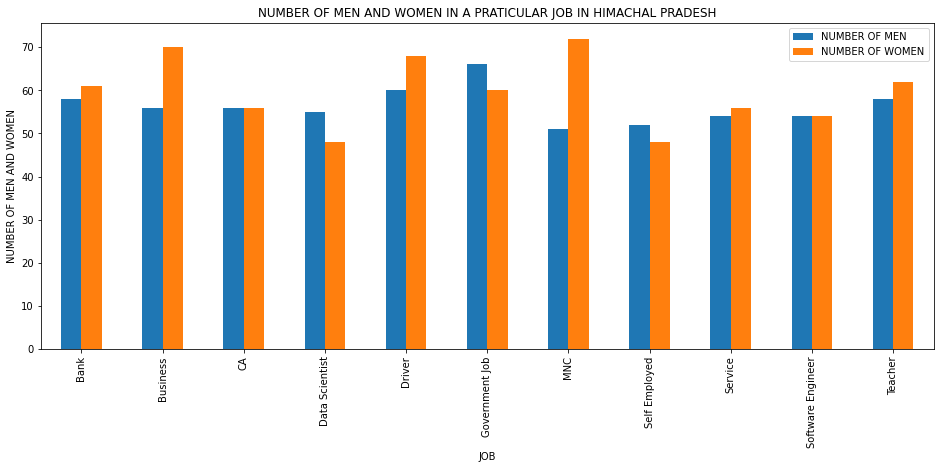

Analysing Haryana
The number of cities in this state are 6
The prominent cities in this state are
['Ambala' 'Faridabad' 'Rewari' 'Hisar' 'Gurgaon' 'Rohtak']
The number of men and women in Haryana are
        COUNT
GENDER       
F         495
M         447
The food type that the entire population of the state likes
              FOOD_TYPE
Mughlai             117
Thai                111
Italian             110
Chinese             108
North Indian        106
Continental         100
Lebanese            100
Punjabi              99
Street Food          91


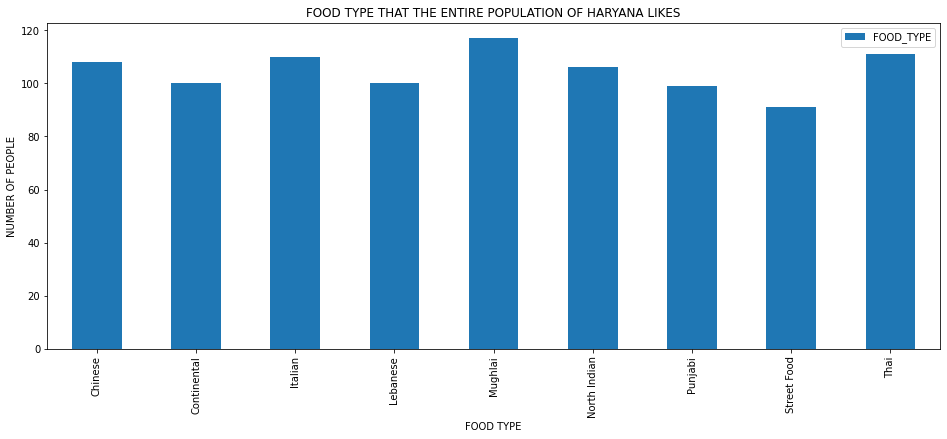

The number of men and women in Haryana liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            57         51
Continental        46         54
Italian            58         52
Lebanese           53         47
Mughlai            53         64
North Indian       49         57
Punjabi            48         51
Street Food        37         54
Thai               46         65


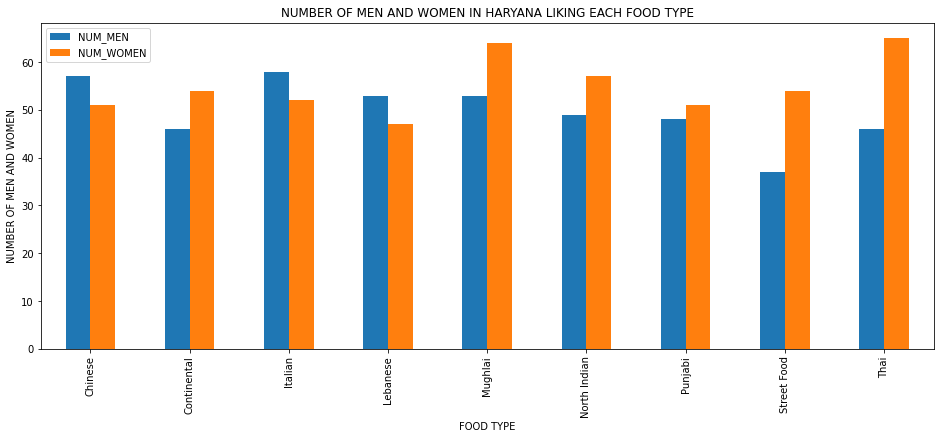

Job pursued by men and women in Haryana are:
                   JOB
MNC                106
Service             97
Software Engineer   95
Data Scientist      91
Bank                86
Self Employed       85
Business            82
Government Job      79
CA                  76
Teacher             75
Driver              70


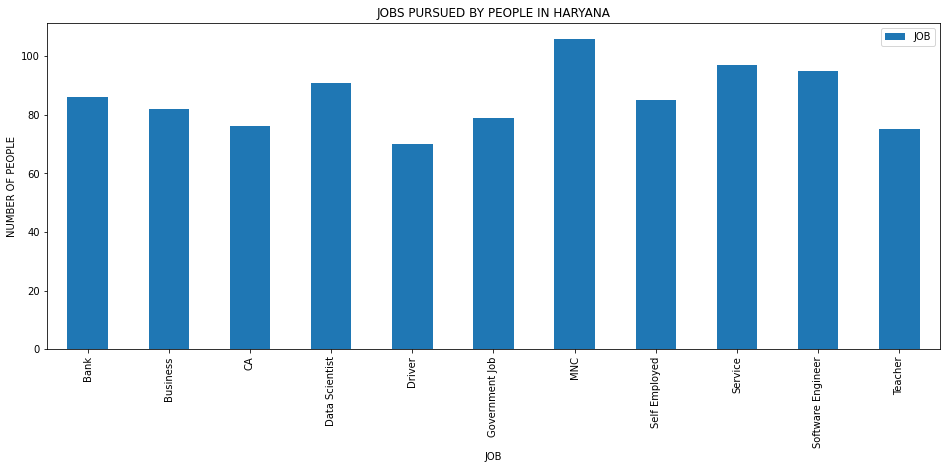

The job pursued in Haryana by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          46               40
Business                      35               47
CA                            32               44
Data Scientist                50               41
Driver                        29               41
Government Job                36               43
MNC                           44               62
Self Employed                 45               40
Service                       51               46
Software Engineer             42               53
Teacher                       37               38


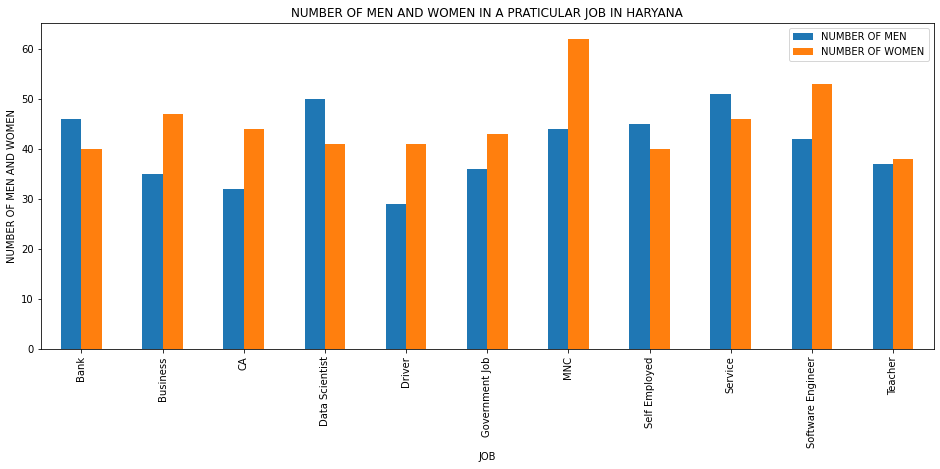

Analysing Uttarakhand
The number of cities in this state are 6
The prominent cities in this state are
['Haridwar' 'Rorkee' 'Nainital' 'Pittorgarh' 'Mussoorie' 'Rishikesh']
The number of men and women in Uttarakhand are
        COUNT
GENDER       
F         565
M         551
The food type that the entire population of the state likes
              FOOD_TYPE
Chinese             164
North Indian        129
Mughlai             125
Italian             124
Thai                122
Continental         121
Punjabi             115
Street Food         110
Lebanese            106


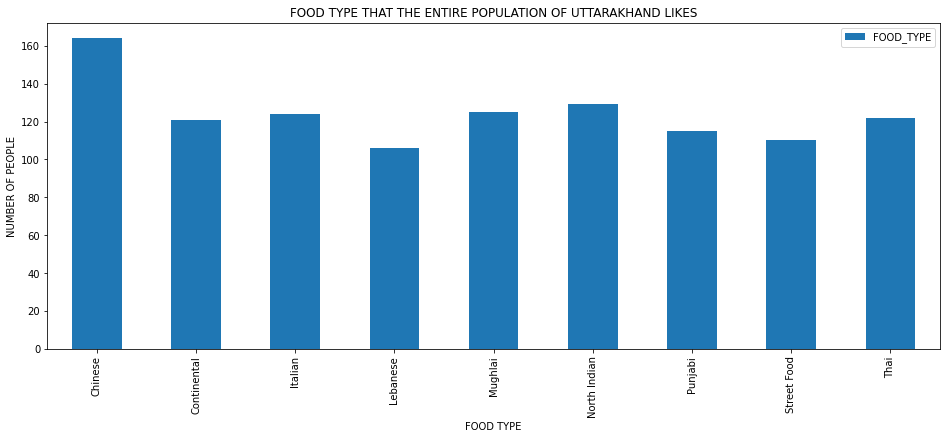

The number of men and women in Uttarakhand liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            77         87
Continental        60         61
Italian            69         55
Lebanese           52         54
Mughlai            58         67
North Indian       51         78
Punjabi            64         51
Street Food        59         51
Thai               61         61


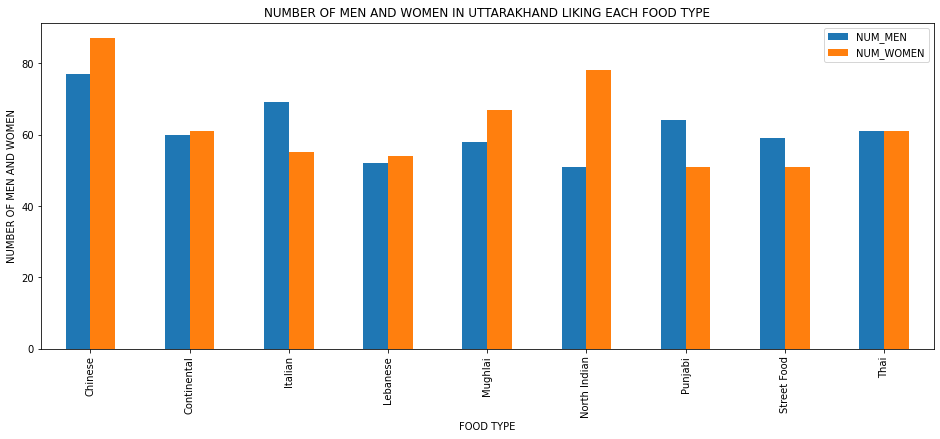

Job pursued by men and women in Uttarakhand are:
                   JOB
Service            111
Teacher            110
Software Engineer  107
Bank               107
CA                 105
Government Job     102
Driver              98
Self Employed       98
Data Scientist      95
MNC                 93
Business            90


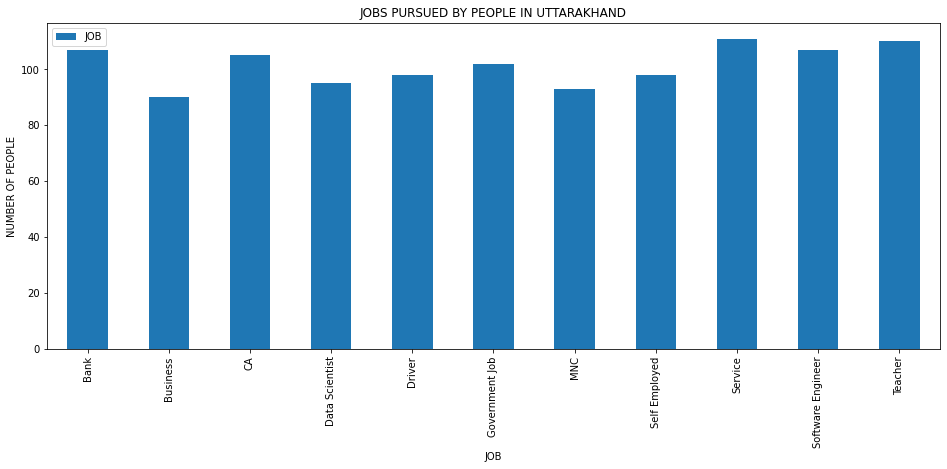

The job pursued in Uttarakhand by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          46               61
Business                      49               41
CA                            40               65
Data Scientist                50               45
Driver                        51               47
Government Job                54               48
MNC                           43               50
Self Employed                 54               44
Service                       51               60
Software Engineer             58               49
Teacher                       55               55


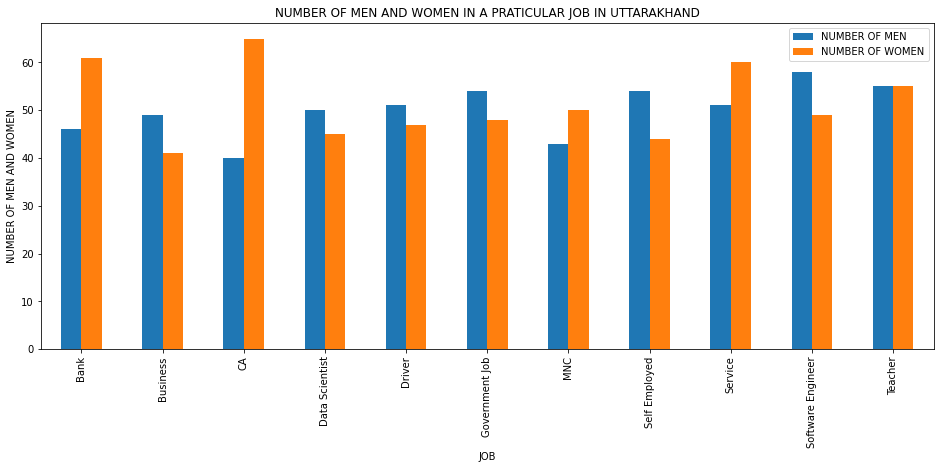

Analysing Union Territory
The number of cities in this state are 2
The prominent cities in this state are
['Delhi' 'Chandigarh']
The number of men and women in Union Territory are
        COUNT
GENDER       
F         148
M         146
The food type that the entire population of the state likes
              FOOD_TYPE
Chinese              45
Lebanese             36
Street Food          35
Punjabi              34
Continental          32
Italian              31
North Indian         28
Mughlai              27
Thai                 26


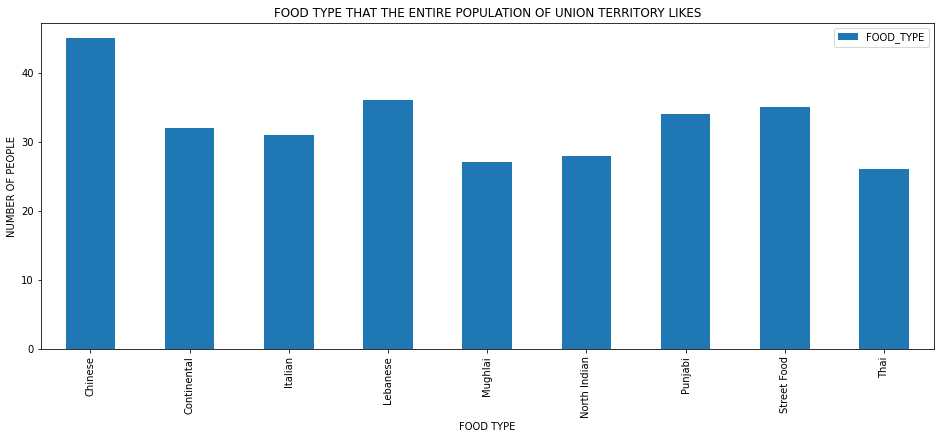

The number of men and women in Union Territory liking each food type are:
              NUM_MEN  NUM_WOMEN
FOOD_TYPE                       
Chinese            19         26
Continental        13         19
Italian            16         15
Lebanese           24         12
Mughlai            12         15
North Indian       15         13
Punjabi            19         15
Street Food        14         21
Thai               14         12


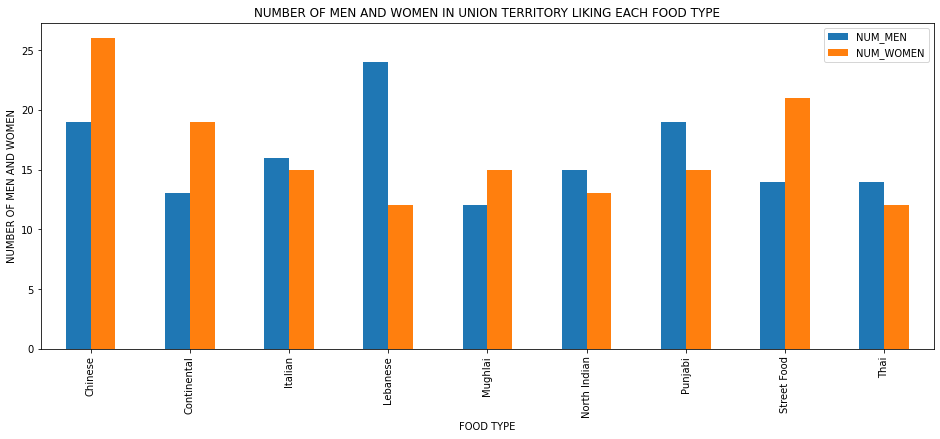

Job pursued by men and women in Union Territory are:
                   JOB
MNC                 30
Government Job      30
Data Scientist      29
Self Employed       29
CA                  27
Teacher             27
Software Engineer   26
Business            26
Bank                25
Driver              23
Service             22


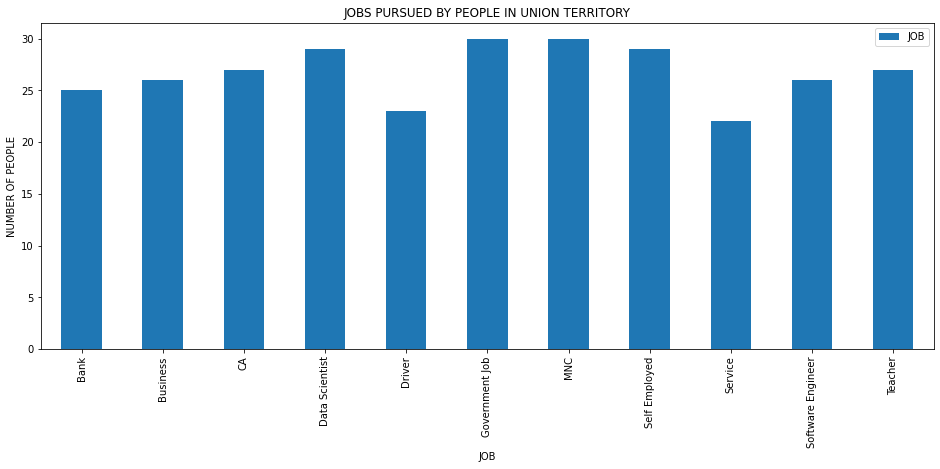

The job pursued in Union Territory by men and wommen are:
                   NUMBER OF MEN  NUMBER OF WOMEN
JOB                                              
Bank                          15               10
Business                       9               17
CA                            16               11
Data Scientist                13               16
Driver                        11               12
Government Job                14               16
MNC                           14               16
Self Employed                 17               12
Service                       11               11
Software Engineer             12               14
Teacher                       14               13


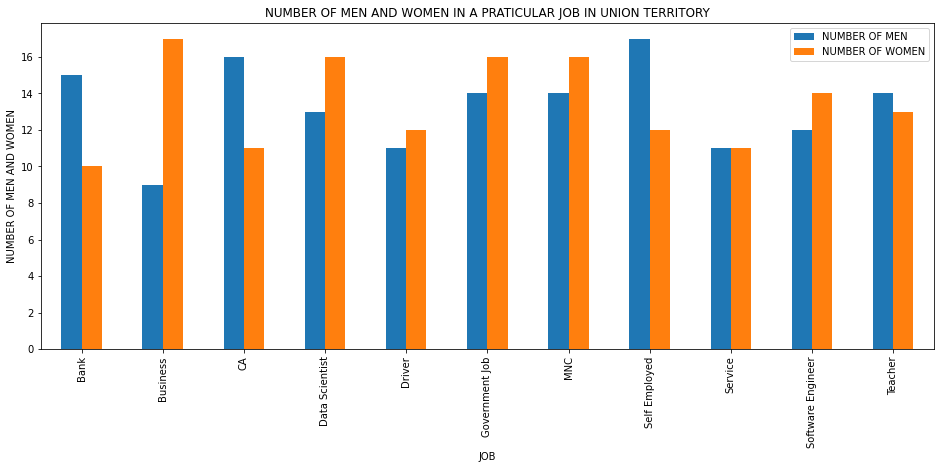

In [10]:
print(f"The are {combined['CITY'].nunique()} different cities in {combined['STATE'].nunique()} states")
print('Number of cities in each state')
print(pd.DataFrame(combined.groupby(by=['STATE'])['CITY'].nunique()).rename(columns={'CITY':'NUMBER OF CITIES'}))
# Analysing the population of each city 
city_group = pd.DataFrame(combined.groupby(by=['GENDER','CITY'])['CITY'].count())
city_men = pd.DataFrame(city_group.xs('M')).rename(columns={'CITY':'NUM_MEN'})
city_women =  pd.DataFrame(city_group.xs('F')).rename(columns={'CITY':'NUM_WOMEN'})
city_combined = city_men.join(city_women)
print(city_combined)

fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x=combined['CITY'],ax=ax,order=combined['CITY'].value_counts().index)
ax.set_title('STUDYING THE POPULATION IN EACH CITY')
ax.set_xlabel('CITY')
ax.set_ylabel('NUMBER OF PEOPLE')
plt.xticks(rotation=90)
plt.show()

# Analysing the population of men in each city 
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x=men_df['CITY'], ax=ax,order=men_df['CITY'].value_counts().index)
ax.set_xlabel('CITY')
ax.set_ylabel('NUMBER OF MEN IN EACH CITY')
ax.set_title('STUDYING THE POPULATION OF MEN IN EACH CITY')
plt.xticks(rotation=90)
plt.show()

# Analysing the population of women in each city 
fig, ax = plt.subplots(figsize=(16,6))
sns.countplot(x=women_df['CITY'], ax=ax,order=women_df['CITY'].value_counts().index)
ax.set_xlabel('CITY')
ax.set_ylabel('NUMBER OF WOMEN IN EACH CITY')
ax.set_title('STUDYING THE POPULATION OF WOMEN IN EACH CITY')
plt.xticks(rotation=90)
plt.show()

# Analysing the population of men and women in each state 
state_gender_df = pd.DataFrame(combined.groupby(by=['GENDER','STATE'])['STATE'].count())
state_men_df = state_gender_df.xs('M').rename(columns={'STATE':'NUM_MEN'})
state_women_df = state_gender_df.xs('F').rename(columns={'STATE':'NUM_WOMEN'})
state_compare_df = state_men_df.join(state_women_df)
print('The number of men and women in each state')
print(state_compare_df)
state_compare_df.plot(kind='bar',figsize=(16,6),xlabel='STATE',ylabel='NUMBER OF MEN AND WOMEN',title='NUMBER OF MEN AND WOMEN IN EACH STATE')
plt.show()

# State wise analysis
def analyze_state(state):
    state_df = combined[combined['STATE']==state]
    print(f"The number of cities in this state are {state_df['CITY'].nunique()}")
    print('The prominent cities in this state are')
    print(state_df['CITY'].unique())
    print(f'The number of men and women in {state} are')
    print(pd.DataFrame(state_df.groupby(by='GENDER')['GENDER'].count()).rename(columns={'GENDER':'COUNT'}))
    print(f'The food type that the entire population of the state likes')
    print(pd.DataFrame(state_df['FOOD_TYPE'].value_counts()))
    food_pop = pd.DataFrame(state_df.groupby(by=['FOOD_TYPE'])['FOOD_TYPE'].count())
    food_pop.rename(columns={'FOOD_TYPE':'NUMBER OF PEOPLE'})
    food_pop.plot(kind='bar',figsize=(16,6),xlabel='FOOD TYPE',ylabel='NUMBER OF PEOPLE',title=f'FOOD TYPE THAT THE ENTIRE POPULATION OF {state.upper()} LIKES')
    plt.show()
    state_group_food = pd.DataFrame(state_df.groupby(by=['GENDER','FOOD_TYPE'])['FOOD_TYPE'].count())
    state_food_men = state_group_food.xs('M').rename(columns={'FOOD_TYPE':'NUM_MEN'})
    state_food_women = state_group_food.xs('F').rename(columns={'FOOD_TYPE':'NUM_WOMEN'})
    state_food_join = state_food_men.join(state_food_women,how='inner')
    print(f'The number of men and women in {state} liking each food type are:')
    print(state_food_join)
    state_food_join.plot(kind='bar',figsize=(16,6),xlabel='FOOD TYPE',ylabel='NUMBER OF MEN AND WOMEN',title=f'NUMBER OF MEN AND WOMEN IN {state.upper()} LIKING EACH FOOD TYPE')
    plt.show()
    print(f'Job pursued by men and women in {state} are:')
    print(pd.DataFrame(state_df['JOB'].value_counts()))
    job_pop = pd.DataFrame(state_df.groupby(by='JOB')['JOB'].count())
    job_pop.rename(columns={'JOB':'NUMBER OF PEOPLE'})
    job_pop.plot(kind='bar',figsize=(16,6), xlabel='JOB',ylabel='NUMBER OF PEOPLE',title=f'JOBS PURSUED BY PEOPLE IN {state.upper()}')
    plt.show()
    state_group_job = pd.DataFrame(state_df.groupby(by=['GENDER','JOB'])['JOB'].count())
    state_job_men = state_group_job.xs('M').rename(columns={'JOB':'NUMBER OF MEN'})
    state_job_women = state_group_job.xs('F').rename(columns={'JOB':'NUMBER OF WOMEN'})
    state_job_join = state_job_men.join(state_job_women, how='inner')
    print(f'The job pursued in {state} by men and wommen are:')
    print(state_job_join)
    state_job_join.plot(kind='bar',figsize=(16,6),xlabel='JOB',ylabel='NUMBER OF MEN AND WOMEN',title=f'NUMBER OF MEN AND WOMEN IN A PRATICULAR JOB IN {state.upper()}')
    plt.show()
    
# Analysing each state 
for state in states:
    print(f'Analysing {state}')
    analyze_state(state)

                   NUM_MEN  NUM_WOMEN
JOB                                  
Service                479        441
MNC                    465        490
Bank                   461        429
Self Employed          461        408
Data Scientist         460        439
Software Engineer      458        470
Business               456        461
Government Job         450        457
Teacher                445        477
CA                     423        481
Driver                 415        474


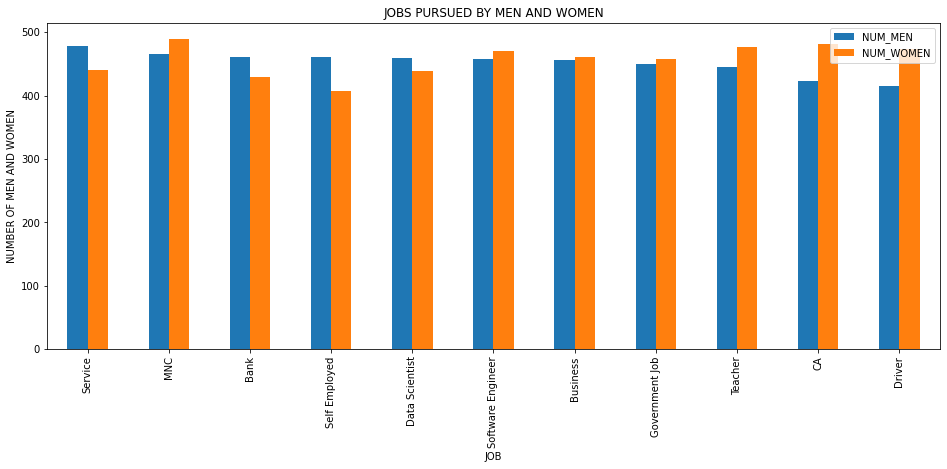

Comparision of men and women in each profession liking Italian
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    53         50
Business                51         45
CA                      47         60
Data Scientist          54         43
Driver                  49         54
Government Job          61         43
MNC                     49         59
Self Employed           50         44
Service                 51         44
Software Engineer       49         53
Teacher                 56         62


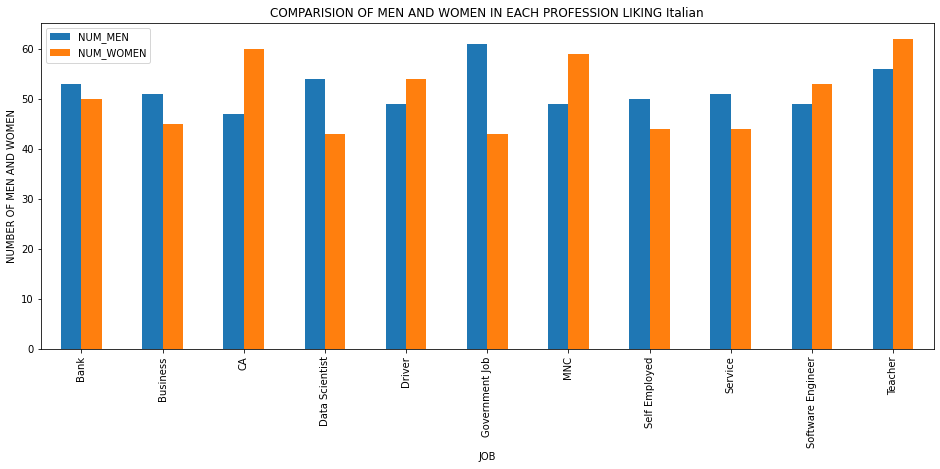

Comparision of men and women in each profession liking Lebanese
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    54         47
Business                42         51
CA                      46         46
Data Scientist          45         43
Driver                  55         52
Government Job          54         44
MNC                     46         58
Self Employed           54         48
Service                 54         43
Software Engineer       35         46
Teacher                 49         55


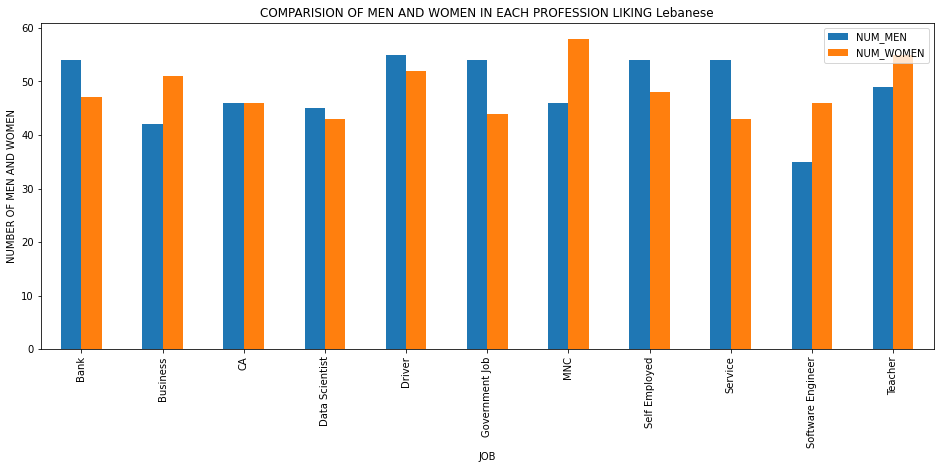

Comparision of men and women in each profession liking Chinese
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    51         51
Business                48         51
CA                      49         59
Data Scientist          46         51
Driver                  38         54
Government Job          47         57
MNC                     53         44
Self Employed           61         41
Service                 59         62
Software Engineer       56         64
Teacher                 43         56


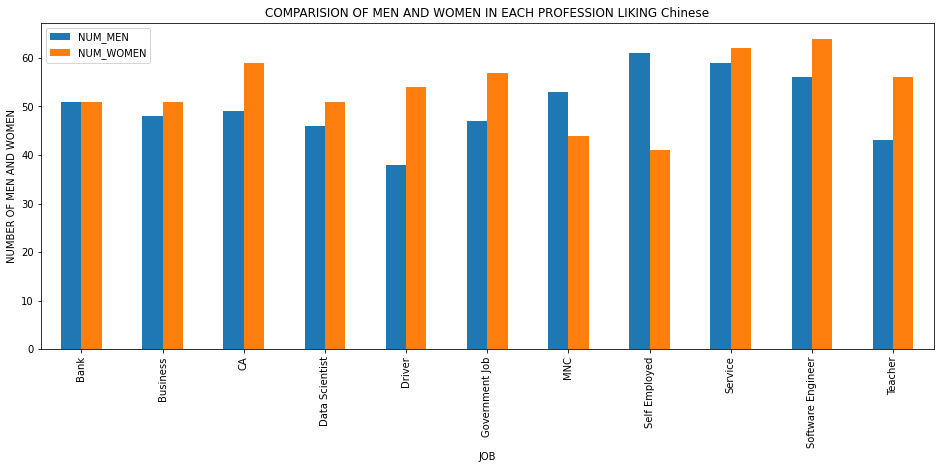

Comparision of men and women in each profession liking North Indian
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    52         55
Business                53         44
CA                      40         57
Data Scientist          60         49
Driver                  42         51
Government Job          49         47
MNC                     55         48
Self Employed           48         46
Service                 48         54
Software Engineer       52         47
Teacher                 44         50


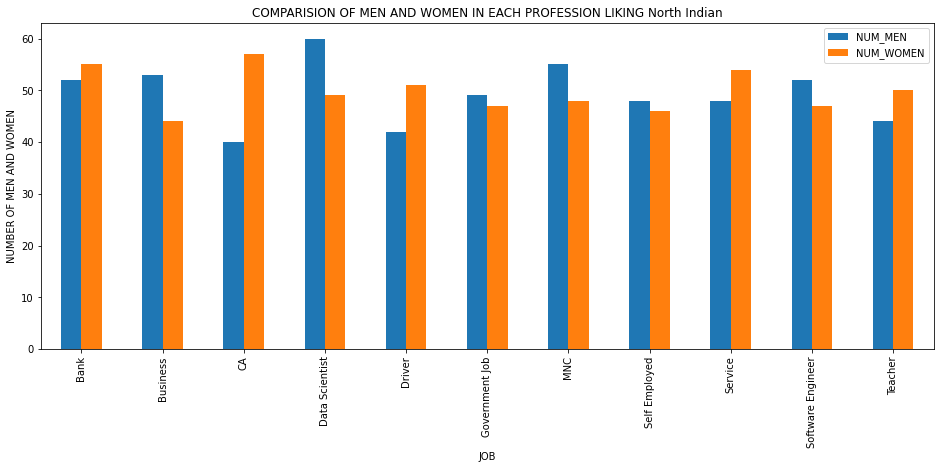

Comparision of men and women in each profession liking Street Food
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    36         49
Business                52         50
CA                      48         59
Data Scientist          53         60
Driver                  34         52
Government Job          43         46
MNC                     50         47
Self Employed           51         36
Service                 55         56
Software Engineer       56         48
Teacher                 56         52


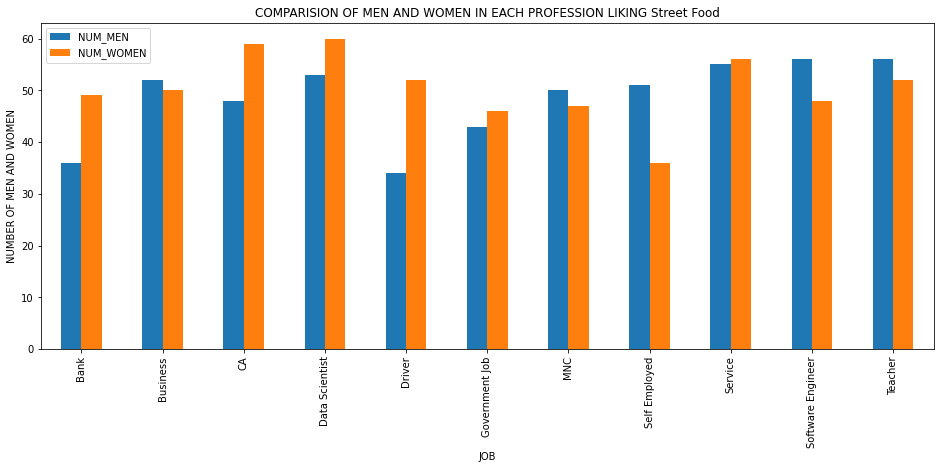

Comparision of men and women in each profession liking Thai
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    44         40
Business                66         51
CA                      46         57
Data Scientist          51         64
Driver                  53         42
Government Job          61         56
MNC                     44         51
Self Employed           51         45
Service                 54         51
Software Engineer       54         46
Teacher                 45         53


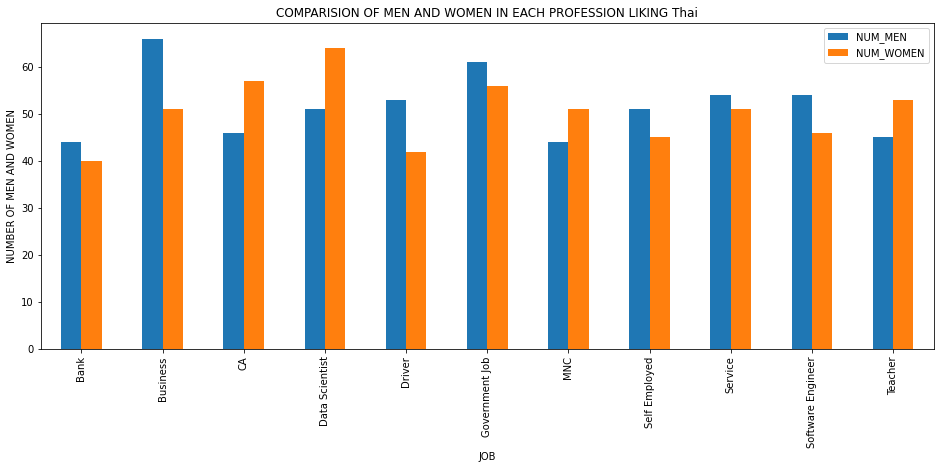

Comparision of men and women in each profession liking Punjabi
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    64         46
Business                48         48
CA                      48         60
Data Scientist          48         42
Driver                  52         40
Government Job          39         46
MNC                     63         61
Self Employed           53         49
Service                 54         48
Software Engineer       54         62
Teacher                 54         52


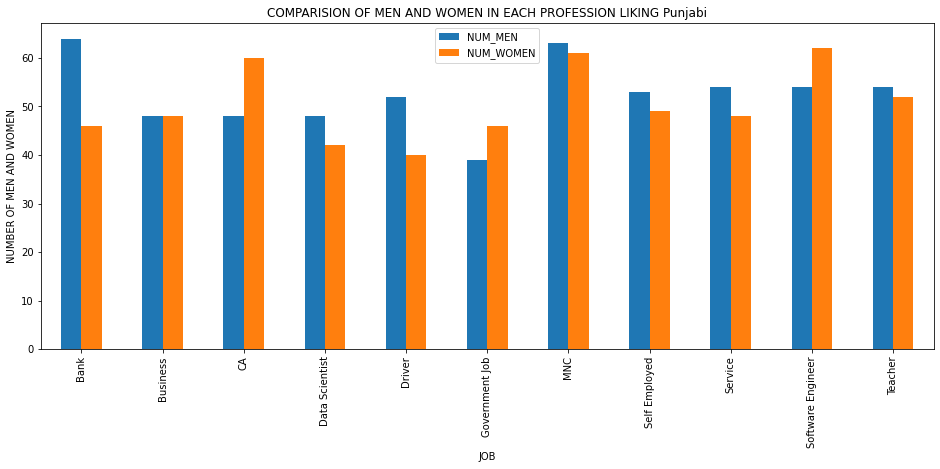

Comparision of men and women in each profession liking Continental
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    52         43
Business                49         47
CA                      47         33
Data Scientist          69         39
Driver                  55         70
Government Job          46         67
MNC                     54         58
Self Employed           38         56
Service                 49         48
Software Engineer       47         47
Teacher                 52         53


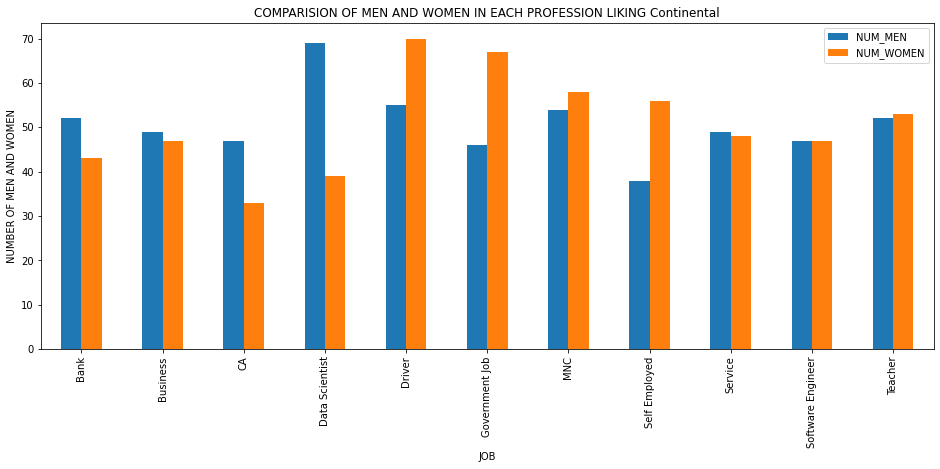

Comparision of men and women in each profession liking Mughlai
                   NUM_MEN  NUM_WOMEN
JOB                                  
Bank                    55         48
Business                47         74
CA                      52         50
Data Scientist          34         48
Driver                  37         59
Government Job          50         51
MNC                     51         64
Self Employed           55         43
Service                 55         35
Software Engineer       55         57
Teacher                 46         44


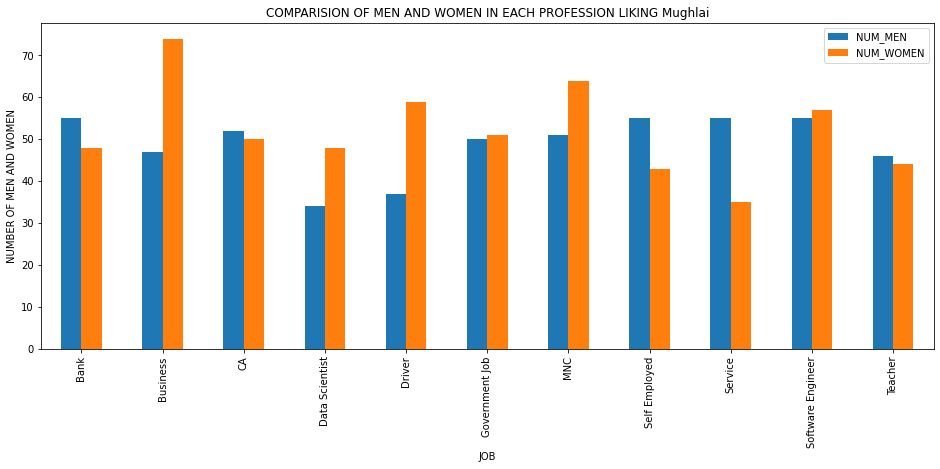

The jobs pursued by Working people
                   MEN  WOMEN
JOB                          
Bank               183    153
Business           198    183
CA                 189    190
Data Scientist     169    158
Driver             186    204
Government Job     180    184
MNC                199    195
Self Employed      194    165
Service            196    170
Software Engineer  168    186
Teacher            190    191


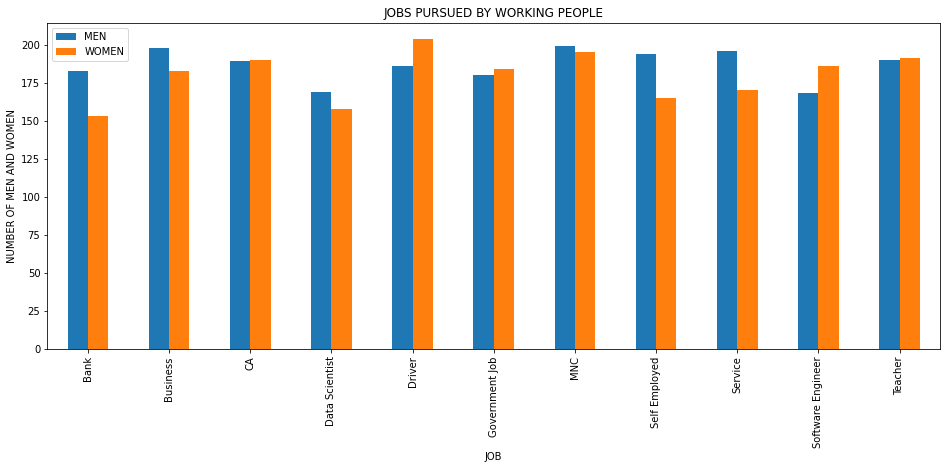

The jobs pursued by Senior Citizen people
                   MEN  WOMEN
JOB                          
Bank               191    185
Business           175    183
CA                 153    184
Data Scientist     193    203
Driver             150    187
Government Job     172    191
MNC                172    194
Self Employed      192    166
Service            190    170
Software Engineer  186    199
Teacher            168    203


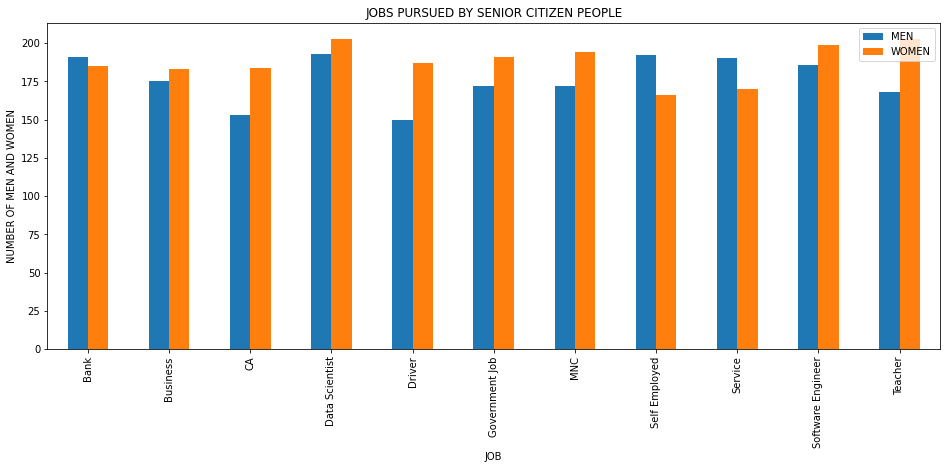

The jobs pursued by Young people
                   MEN  WOMEN
JOB                          
Bank                87     91
Business            83     95
CA                  81    107
Data Scientist      98     78
Driver              79     83
Government Job      98     82
MNC                 94    101
Self Employed       75     77
Service             93    101
Software Engineer  104     85
Teacher             87     83


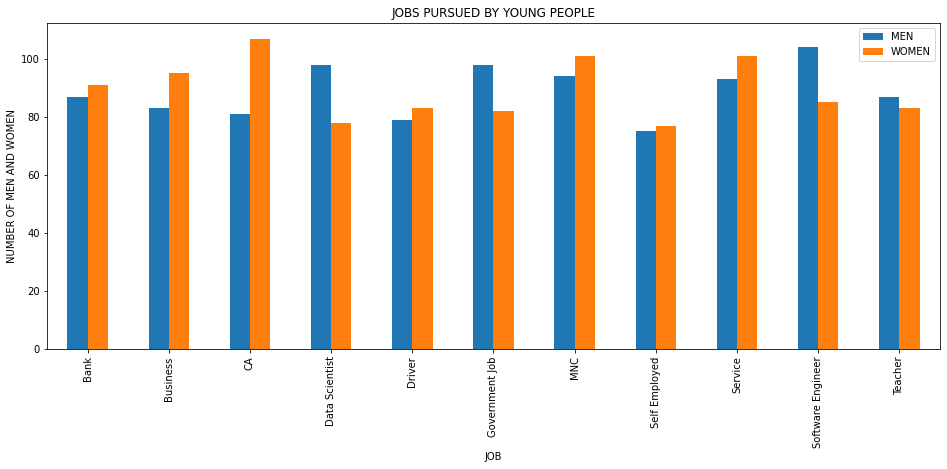

In [11]:
# Jobs pursued by each gender 
jobs_gender = combined.groupby(by='GENDER')['JOB'].value_counts()
jobs_men = pd.DataFrame(jobs_gender.xs('M')).rename(columns={'JOB':'NUM_MEN'})
jobs_women = pd.DataFrame(jobs_gender.xs('F')).rename(columns={'JOB':'NUM_WOMEN'})
jobs_comparision = jobs_men.join(jobs_women, how='inner')
print(jobs_comparision)
jobs_comparision.plot(kind='bar',figsize=(16,6),xlabel='JOB',ylabel='NUMBER OF MEN AND WOMEN',title='JOBS PURSUED BY MEN AND WOMEN')
plt.show()

# Men and women in each job liking food types 
for food in food_types:
    food_df = combined[combined['FOOD_TYPE'] == food]
    food_groups = pd.DataFrame(food_df.groupby(by=['GENDER','JOB'])['FOOD_TYPE'].count())
    food_men = food_groups.xs('M').rename(columns={'FOOD_TYPE':'NUM_MEN'})
    food_women = food_groups.xs('F').rename(columns={'FOOD_TYPE':'NUM_WOMEN'})
    job_food_both = food_men.join(food_women)
    print(f'Comparision of men and women in each profession liking {food}')
    print(job_food_both)
    job_food_both.plot(kind='bar',figsize=(16,6),xlabel='JOB',ylabel='NUMBER OF MEN AND WOMEN',
    title=f'COMPARISION OF MEN AND WOMEN IN EACH PROFESSION LIKING {food}')
    plt.show()
    
# Jobs pursued by people of each age group
age_job = pd.DataFrame(combined.groupby(by=['GENDER','AGE GROUP','JOB'])['JOB'].count())
age_job_combined = age_job.xs('M').rename(columns={'JOB':'MEN'}).join(age_job.xs('F').rename(columns={'JOB':'WOMEN'}))
age_groups = combined['AGE GROUP'].unique()
for grp in age_groups:
    age_df = age_job_combined.xs(grp)
    print(f'The jobs pursued by {grp} people')
    print(age_df)
    age_df.plot(kind='bar',figsize=(16,6),xlabel='JOB',ylabel='NUMBER OF MEN AND WOMEN',
    title=f'JOBS PURSUED BY {grp.upper()} PEOPLE')
    plt.show()